# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1 Reading Data

In [2]:
## Taking only first 50000 points 

project = pd.read_csv('train_data.csv',nrows=50000)
print("Number of data points in train data", project.shape)
print("\nThe attributes of data :", project.columns.values)


Number of data points in train data (50000, 17)

The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [3]:
resource = pd.read_csv('resources.csv')
print("Number of data points in train data", resource.shape)
print("\nThe attributes of data :", resource.columns.values)
resource.head(2)

Number of data points in train data (1541272, 4)

The attributes of data : ['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [4]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price= resource.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [5]:
# join two dataframes in python: 
project = pd.merge(project, price, on='id', how='left')
project.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity'],
      dtype='object')

In [6]:
project['project_is_approved'].value_counts()

1    42286
0     7714
Name: project_is_approved, dtype: int64

Observation:-
Clearly we can see that the data is imbalanced, also we know that kNN is affected by imbalanced dataset. Given a query point xq, it will return us the dominating class label(in this case, it will return 1). We have to balance the dataset by any of the following techniques:- 
1. Undersampling
2. Oversampling
3.
4.

In [7]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project['Date'] = pd.to_datetime(project['project_submitted_datetime'])
project.drop('project_submitted_datetime', axis=1, inplace=True)
project.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project = project[cols]


project.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

             project_subject_categories project_subject_subcategories  \
473                    Applied Learning             Early Development   
41558               Literacy & Language                      Literacy   
29891  Math & Science, History & Civics  Mathematics, Social Sciences   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   
29891      Breakout Box to Ignite Engagement!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   
29891  My students desire challenges, movement, and c...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   
29891  I will design different clues using specific c...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   
29891  Donations to this project will immediately imp...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   
29891                                             6                    1   

        price  quantity  
473    481.04         9  
41558   17.74        14  
29891  102.50        11

## 2  Preprocessing data:-

###  preprocessing of `project_subject_categories`

In [8]:
categories = list(project['project_subject_categories'])
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project['clean_categories'] = cat_list
project.drop(['project_subject_categories'], axis=1, inplace=True)
project.head(3)

from collections import Counter
my_counter = Counter()                              ##Once initialized, counters are accessed just like dictionaries.
for word in project['clean_categories'].values:     ##Also, it does not raise the KeyValue error (if key is not present)
    my_counter.update(word.split())                 ##instead the value’s count is shown as 0.
                               
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
sorted_cat_dict

{'Warmth': 643,
 'Care_Hunger': 643,
 'History_Civics': 2689,
 'Music_Arts': 4699,
 'AppliedLearning': 5569,
 'SpecialNeeds': 6233,
 'Health_Sports': 6538,
 'Math_Science': 18874,
 'Literacy_Language': 23998}

###  preprocessing of `project_subject_subcategories`

In [9]:
sub_categories = list(project['project_subject_subcategories'])
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project['clean_subcategories'] = sub_cat_list
project.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
sorted_sub_cat_dict

{'Economics': 127,
 'CommunityService': 214,
 'FinancialLiteracy': 253,
 'ParentInvolvement': 302,
 'Extracurricular': 373,
 'Civics_Government': 380,
 'ForeignLanguages': 388,
 'NutritionEducation': 617,
 'Warmth': 643,
 'Care_Hunger': 643,
 'SocialSciences': 864,
 'PerformingArts': 910,
 'CharacterEducation': 958,
 'TeamSports': 995,
 'Other': 1128,
 'College_CareerPrep': 1168,
 'Music': 1432,
 'History_Geography': 1433,
 'Health_LifeScience': 1876,
 'EarlyDevelopment': 1937,
 'ESL': 1999,
 'Gym_Fitness': 2068,
 'EnvironmentalScience': 2533,
 'VisualArts': 2865,
 'Health_Wellness': 4732,
 'AppliedSciences': 4901,
 'SpecialNeeds': 6233,
 'Literature_Writing': 10127,
 'Mathematics': 12832,
 'Literacy': 15611}

###  preprocessing of `project_grade_category`

In [10]:
print("Project grade category before preprocessing ", project['project_grade_category'].head(3))
grade_categories = list(project['project_grade_category'])
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for j in grade_categories:
    j = j.replace(' ','_') # we are placing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    j = j.replace('-','_') # we are placing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    grade_cat_list.append(j)

print("Project grade category after preprocessing ", grade_cat_list[:5])

Project grade category before preprocessing  473      Grades PreK-2
41558       Grades 3-5
29891       Grades 3-5
Name: project_grade_category, dtype: object
Project grade category after preprocessing  ['Grades_PreK_2', 'Grades_3_5', 'Grades_3_5', 'Grades_PreK_2', 'Grades_PreK_2']


In [11]:
project['clean_grade_category'] = grade_cat_list
project.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter


clean_grade_category_list= list(project['clean_grade_category'])
clean_grade_category_counter= Counter(clean_grade_category_list)
clean_grade_category_counter
    

Counter({'Grades_PreK_2': 20316,
         'Grades_3_5': 16968,
         'Grades_9_12': 4966,
         'Grades_6_8': 7750})

###  preprocessing of `teacher_prefix`

In [12]:
print('\n following are the null values')
project.loc[project['teacher_prefix'].isnull()].head(2)


 following are the null values


Unnamed: 0       id                        teacher_id teacher_prefix  \
30368       22174  p002730  339bd5a9e445d68a74d65b99cd325397            NaN   
7820        17809  p180947  834f75f1b5e24bd10abe9c3dbf7ba12f            NaN   

      school_state                Date  \
30368           SC 2016-05-09 09:38:40   
7820            CA 2016-11-04 00:15:45   

                                          project_title  \
30368                           iPads for STEM Stations   
7820   1:7 Increasing Tech to Decrease Achievement Gaps   

                                         project_essay_1  \
30368  Within the next 20 years, every job will invol...   
7820   The children at Anna Yates Elementary school a...   

                                         project_essay_2  \
30368  The students in our school come from a wide va...   
7820   My goal is to bring in 1 laptop for every 7 st...   

                                         project_essay_3  \
30368  Students will use the iPad station for individ...   
7820                                                 NaN   

                                         project_essay_4  \
30368  Your generosity will allow my students to work...   
7820                                                 NaN   

                                project_resource_summary  \
30368        My students need 5 iPads for STEM stations.   
7820   My students need a classroom laptop that is ju...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
30368                                             0                    1   
7820                                              1                    1   

        price  quantity                clean_categories  \
30368  285.86        16               Literacy_Language   
7820   910.87         2  Literacy_Language Math_Science   

                  clean_subcategories clean_grade_category  
30368              Literature_Writing          Grades_9_12  
7820   Literature_Writing Mathematics           Grades_3_5

In [13]:
project['teacher_prefix'].fillna('No-prefix', inplace= True)  ## replacing the null values

from collections import Counter

teacher_prefix_list= list(project['teacher_prefix'])
teacher_prefix_counter= Counter(teacher_prefix_list)




### preprocessing of `school_state`

In [14]:
school_state_list= list(sorted(project['school_state']))
school_state_counter=Counter(school_state_list)

## 2.1 Text preprocessing

### Text preprocessing: Essay

In [15]:
# merge two column text dataframe: 

project["essay"] = project["project_essay_1"].map(str) +\
                        project["project_essay_2"].map(str) + \
                        project["project_essay_3"].map(str) + \
                        project["project_essay_4"].map(str)


# printing some random essays.
print(project['essay'].values[0])
print("="*100)
print(project['essay'].values[150])
print("="*100)
print("="*100)
print(project['essay'].values[9999])
print("="*100)


I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [16]:
# https://stackoverflow.com/a/47091490/4084039

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

essay_9999 = decontracted(project['essay'].values[9999])
print(essay_9999)
print("="*50)

Kindergarten is the base that everything builds upon and my students love learning though hands-on experiences that allow them to communicate their learning in a variety of ways.  Our school has over 60% high poverty, so creating shared experiences is a high priority of mine.  My kindergarteners thrive when they have multiple ways of learning the same concept since they often times do not all learn the same way and having these resources to help teach math would allow them to soar!My students need to experience math in a variety of ways for them to truly understand numbers and mathematical concepts.  These materials will allow them to have an organized area and the tools to be successful.  These materials can also be used in so many different ways that allows them to be used all year long!  Since my students come from such diverse backgrounds, creating an environment that allows exploration, students teaching students and differentiated activities is essential to their success and crea

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(project['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:34<00:00, 1444.81it/s]


In [19]:
project['preprocessed_essays']=preprocessed_essays
project.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                             ...                          \
473                          ...                           
41558                        ...                           

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

      teacher_number_of_previously_posted_projects  project_is_approved  \
473                                              2                    1   
41558                                            2                    1   

        price  quantity   clean_categories clean_subcategories  \
473    481.04         9    AppliedLearning    EarlyDevelopment   
41558   17.74        14  Literacy_Language            Literacy   

      clean_grade_category                                              essay  \
473          Grades_PreK_2  I recently read an article about giving studen...   
41558           Grades_3_5  My students crave challenge, they eat obstacle...   

                                     preprocessed_essays  
473    recently read article giving students choice l...  
41558  students crave challenge eat obstacles breakfa...  

[2 rows x 21 columns]

In [20]:
## dropping the essay 1 to 4
project.drop(['project_essay_1'], axis=1, inplace=True)
project.drop(['project_essay_2'], axis=1, inplace=True)
project.drop(['project_essay_3'], axis=1, inplace=True)
project.drop(['project_essay_4'], axis=1, inplace=True)
project.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

        price  quantity   clean_categories clean_subcategories  \
473    481.04         9    AppliedLearning    EarlyDevelopment   
41558   17.74        14  Literacy_Language            Literacy   

      clean_grade_category                                              essay  \
473          Grades_PreK_2  I recently read an article about giving studen...   
41558           Grades_3_5  My students crave challenge, they eat obstacle...   

                                     preprocessed_essays  
473    recently read article giving students choice l...  
41558  students crave challenge eat obstacles breakfa...

### Text preprocessing- project title

In [21]:
# printing some random project titles.

print(project['project_title'].values[0])
print("="*50)
print(project['project_title'].values[9999])
print("="*50)

Flexible Seating for Flexible Learning
3, 2, 1...Blast Off into Math!


In [22]:
titles = decontracted(project['project_title'].values[9999])
print(titles)
print("="*130)

3, 2, 1...Blast Off into Math!


In [23]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_titles = []
# tqdm is for printing the status bar
for title in tqdm(project['project_title'].values):
    titles = decontracted(title)
    titles = titles.replace('\\r', ' ')
    titles = titles.replace('\\"', ' ')
    titles = titles.replace('\\n', ' ')
    titles = re.sub('[^A-Za-z0-9]+', ' ', titles)
    # https://gist.github.com/sebleier/554280
    titles = ' '.join(e for e in titles.split() if e not in stopwords)
    preprocessed_project_titles.append(titles.lower().strip())
    

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 32641.31it/s]


In [24]:
# after preprocessing

print(preprocessed_project_titles[0])
project["preprocessed_project_titles"] = preprocessed_project_titles
project["preprocessed_project_titles"][:5]

flexible seating flexible learning


473       flexible seating flexible learning
41558      going deep the art inner thinking
29891         breakout box ignite engagement
23374                          ipad learners
49228    a flexible classroom flexible minds
Name: preprocessed_project_titles, dtype: object

In [25]:
project.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

        price  quantity   clean_categories clean_subcategories  \
473    481.04         9    AppliedLearning    EarlyDevelopment   
41558   17.74        14  Literacy_Language            Literacy   

      clean_grade_category                                              essay  \
473          Grades_PreK_2  I recently read an article about giving studen...   
41558           Grades_3_5  My students crave challenge, they eat obstacle...   

                                     preprocessed_essays  \
473    recently read article giving students choice l...   
41558  students crave challenge eat obstacles breakfa...   

              preprocessed_project_titles  
473    flexible seating flexible learning  
41558   going deep the art inner thinking

#### <h3>Sentiment Scores</h3>

In [26]:
'''
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sia.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

'''

"\nimport nltk\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\n\nnltk.download('vader_lexicon')\n\nsia = SentimentIntensityAnalyzer()\n\nfor_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide rangeof techniques to help all my students succeed students in my class come from a variety of different backgrounds which makesfor wonderful sharing of experiences and cultures including native americans our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it ismastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten 

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

ss = sia.polarity_scores('preprocessed_essays')


G:\Anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
Sentiment_score=[]

for i in project['preprocessed_essays']:
    ss = sia.polarity_scores(i)
    Sentiment_score.append(ss)

Sentiment_score

[{'neg': 0.031, 'neu': 0.775, 'pos': 0.194, 'compound': 0.9524},
 {'neg': 0.031, 'neu': 0.653, 'pos': 0.315, 'compound': 0.9873},
 {'neg': 0.014, 'neu': 0.691, 'pos': 0.295, 'compound': 0.9935},
 {'neg': 0.068, 'neu': 0.768, 'pos': 0.164, 'compound': 0.9484},
 {'neg': 0.012, 'neu': 0.564, 'pos': 0.424, 'compound': 0.9976},
 {'neg': 0.014, 'neu': 0.646, 'pos': 0.34, 'compound': 0.9875},
 {'neg': 0.008, 'neu': 0.748, 'pos': 0.244, 'compound': 0.9899},
 {'neg': 0.029, 'neu': 0.708, 'pos': 0.263, 'compound': 0.9946},
 {'neg': 0.048, 'neu': 0.704, 'pos': 0.248, 'compound': 0.9859},
 {'neg': 0.035, 'neu': 0.746, 'pos': 0.219, 'compound': 0.9841},
 {'neg': 0.04, 'neu': 0.627, 'pos': 0.333, 'compound': 0.9862},
 {'neg': 0.029, 'neu': 0.779, 'pos': 0.192, 'compound': 0.9877},
 {'neg': 0.096, 'neu': 0.694, 'pos': 0.21, 'compound': 0.9686},
 {'neg': 0.135, 'neu': 0.653, 'pos': 0.212, 'compound': 0.9362},
 {'neg': 0.069, 'neu': 0.676, 'pos': 0.254, 'compound': 0.9938},
 {'neg': 0.0, 'neu': 0.62, '

In [29]:
Sentiment_score[2]['neg']    ##printing the 3rd essay and only its negative polarity score

0.014

In [30]:
negative_score=[]
positive_score=[]
neutral_score=[]
compound_score=[]


for i in project['preprocessed_essays']:
    positive= sia.polarity_scores(i)['pos']
    positive_score.append(positive)
    negative = sia.polarity_scores(i)['neg']
    negative_score.append(negative)
    neutral= sia.polarity_scores(i)['neu']
    neutral_score.append(neutral)
    compound= sia.polarity_scores(i)['compound']
    compound_score.append(compound)
    
    
len(positive_score)

50000

In [31]:
project['positive_sentiment_score']= positive_score
project['negative_sentiment_score']= negative_score
project['neutral_sentiment_score']= neutral_score
project['compound_sentiment_score']= compound_score


project.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

                 ...              clean_categories  clean_subcategories  \
473              ...               AppliedLearning     EarlyDevelopment   
41558            ...             Literacy_Language             Literacy   

      clean_grade_category                                              essay  \
473          Grades_PreK_2  I recently read an article about giving studen...   
41558           Grades_3_5  My students crave challenge, they eat obstacle...   

                                     preprocessed_essays  \
473    recently read article giving students choice l...   
41558  students crave challenge eat obstacles breakfa...   

              preprocessed_project_titles positive_sentiment_score  \
473    flexible seating flexible learning                    0.194   
41558   going deep the art inner thinking                    0.315   

      negative_sentiment_score  neutral_sentiment_score  \
473                      0.031                    0.775   
41558                    0.031                    0.653   

       compound_sentiment_score  
473                      0.9524  
41558                    0.9873  

[2 rows x 22 columns]

#### <h3><font color='black'>Number of words in combined essays</font></h3>

In [32]:
## Now we'll make a new column named title_word_count which gives us total number of words for every project title

essay_word_count=[]

for i in project['preprocessed_essays']:
    word_length= len(i.split())
    essay_word_count.append(word_length)

project['essay_word_count'] = essay_word_count
project.head(2)
print('max words in an essay',max(essay_word_count),'max words in an essay', min(essay_word_count))

max words in an essay 315 max words in an essay 70


##### Number of numbers in combined essays

In [33]:
essay_number_count=0

for i in preprocessed_essays :
    for x in i.split():
        if x.isdigit():
            essay_number_count+=1
    
print('Total number of numbers in the list of preprocessed titles',essay_number_count)

Total number of numbers in the list of preprocessed titles 65676


#### <h3><font color='black'>Number of words in title</font></h3>

In [34]:
print(preprocessed_project_titles[5]  )     
print(preprocessed_project_titles[50] )         ##printing some random titles which contain numbers  
print(preprocessed_project_titles[17]    )   

robots taking 2nd grade
building confident reader 04 21 16
3d printing


In [35]:
## Now we'll make a new column named title_word_count which gives us total number of words for every project title

title_word_count=[]

for i in project['preprocessed_project_titles']:
    word_length= len(i.split())
    title_word_count.append(word_length)

project['title_word_count'] = title_word_count

print('max words in an essay',max(title_word_count),'max words in an essay', min(title_word_count))
project.head(2)

max words in an essay 15 max words in an essay 1


Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   

             ...         clean_grade_category  \
473          ...                Grades_PreK_2   
41558        ...                   Grades_3_5   

                                                   essay  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                     preprocessed_essays  \
473    recently read article giving students choice l...   
41558  students crave challenge eat obstacles breakfa...   

              preprocessed_project_titles positive_sentiment_score  \
473    flexible seating flexible learning                    0.194   
41558   going deep the art inner thinking                    0.315   

      negative_sentiment_score neutral_sentiment_score  \
473                      0.031                   0.775   
41558                    0.031                   0.653   

      compound_sentiment_score  essay_word_count  title_word_count  
473                     0.9524               114                 4  
41558                   0.9873               101                 6  

[2 rows x 24 columns]

In [36]:
##### Number of numbers in project titles

In [37]:
title_number_count=0

for i in preprocessed_project_titles :
    for x in i.split():
        if x.isdigit():
            title_number_count+=1
    
print('Total number of numbers in the list of preprocessed titles',title_number_count)

Total number of numbers in the list of preprocessed titles 1692


# 2.1 Splitting data into Train and cross validation(or test): Stratified Sampling


In [38]:
# train test split
## Called stratified as here data is split in a stratified fashion, using the class label we provide in "stratify".

# defining X and y
X= project
y= project['project_is_approved']

print("Shape of X is", X.shape)
print("Shape of y is",y.shape) ##cross-checking shape as input variables must be consistent

## Splitting
from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print('\nShape of X_1 -', X_1.shape , '\nShape of X_test-' , X_test.shape, '\nShape of y_1-' , y_1.shape, '\nShape of y_test-', y_test.shape)

X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size=0.33, stratify=y_1)
print('\nShape of X_train -', X_train.shape , '\nShape of X_cv-' , X_cv.shape, '\nShape of y_train-' , y_train.shape, '\nShape of y_cv-', y_cv.shape)


Shape of X is (50000, 24)
Shape of y is (50000,)

Shape of X_1 - (33500, 24) 
Shape of X_test- (16500, 24) 
Shape of y_1- (33500,) 
Shape of y_test- (16500,)

Shape of X_train - (22445, 24) 
Shape of X_cv- (11055, 24) 
Shape of y_train- (22445,) 
Shape of y_cv- (11055,)


In [39]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

print('Shape of X_test' , X_test.shape)
print('Shape of X_train' , X_train.shape)
print('Shape of X_test' , X_cv.shape)

Shape of X_test (16500, 23)
Shape of X_train (22445, 23)
Shape of X_test (11055, 23)


###### Now we shall prepare the data matrix, for that we will do one hot encoding of categorical data, vectorization(bow, tfidf, avg w2v, tfidf w2v) of text data, standardization of numerical data for test, train and cv data.

# Preparing data for models

Our primary task is to do process data for models.
We need to merge all numerical, categorical, text vectors.

Categorical:- (For categorical data we are going to take one hot encoded data)
1. clean_categories
2. clean_subcategories
3. clean_grade_categories
4. teacher_prefix
5. school_state

Text:- (For text we are going to take vectorised data)
1. essay
2. project title

Numerical :- (For numerical data we are going to take standardized data)
1. teacher_number_of_previously_posted_projects
2. price

#### Vectorization of "Essay"

##### BOW- Vectorization of "Essay"

In [40]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer_essay_bow = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer_essay_bow.fit(X_train['preprocessed_essays'].values)                      # fit has to happen only on train data
# fit learns a model from the training data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_essay_bow.transform(X_train['preprocessed_essays'].values)
X_cv_essay_bow = vectorizer_essay_bow.transform(X_cv['preprocessed_essays'].values)
X_test_essay_bow = vectorizer_essay_bow.transform(X_test['preprocessed_essays'].values)
   ## transform applies the parameters which it learns to transform the data
    
## fit_transfrom() - combines fit and transform
##https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models

print("After vectorizations :- ")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print('Feature names', vectorizer_essay_bow.get_feature_names())
print("="*100)

After vectorizations :- 
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)
Feature names ['000', '10', '100', '100 free', '100 percent', '100 students', '11', '12', '12th', '12th grade', '13', '14', '15', '16', '17', '18', '19', '1st', '1st grade', '20', '20 students', '200', '2016', '2017', '21', '21st', '21st century', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '35', '3d', '3d printer', '3rd', '3rd grade', '3rd graders', '40', '40 students', '400', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '500 students', '5th', '5th grade', '5th graders', '60', '60 minutes', '60 students', '600', '6th', '6th grade', '6th graders', '70', '70 students', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '98', '99', '9th', 'abilities', 'ability', 'ability learn', 'ability levels', 

##### TFIDF- Vectorization of "Essay"

In [41]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer_essay_tfidf.fit(X_train['preprocessed_essays'].values)


X_train_essay_tfidf = vectorizer_essay_tfidf.transform(X_train['preprocessed_essays'].values)
X_cv_essay_tfidf = vectorizer_essay_tfidf.transform(X_cv['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(X_test['preprocessed_essays'].values)

print("After vectorizations :- ")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print('Feature names', vectorizer_essay_tfidf.get_feature_names())
print("="*100)

After vectorizations :- 
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)
Feature names ['000', '10', '100', '100 free', '100 percent', '100 students', '11', '12', '12th', '12th grade', '13', '14', '15', '16', '17', '18', '19', '1st', '1st grade', '20', '20 students', '200', '2016', '2017', '21', '21st', '21st century', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '35', '3d', '3d printer', '3rd', '3rd grade', '3rd graders', '40', '40 students', '400', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '500 students', '5th', '5th grade', '5th graders', '60', '60 minutes', '60 students', '600', '6th', '6th grade', '6th graders', '70', '70 students', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95', '98', '99', '9th', 'abilities', 'ability', 'ability learn', 'ability levels', 

##### Avg w2v- Vectorization of "Essay"

In [42]:
import pickle

with open('glove_vectors', 'rb') as f:          ## this is unpickinling where r is read, b is binary mode
    model = pickle.load(f)
    glove_words =  set(model.keys())

###### avg w2v of train data

In [43]:
# average Word2Vec for train data

# compute average word2vec for each review.

avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))           

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:08<00:00, 2722.26it/s]


22445
300


In [44]:
## list to array conversion

avg_w2v_vectors_essays_train= np.asarray(avg_w2v_vectors_essays_train)
avg_w2v_vectors_essays_train.shape

(22445, 300)

###### avg w2v of CV data

In [45]:
# average Word2Vec for CV data

# compute average word2vec for each review.

avg_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_cv.append(vector)

print(len(avg_w2v_vectors_essays_cv))
print(len(avg_w2v_vectors_essays_cv[0]))           

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:04<00:00, 2734.47it/s]


11055
300


In [46]:
## list to array conversion

avg_w2v_vectors_essays_cv= np.asarray(avg_w2v_vectors_essays_cv)
avg_w2v_vectors_essays_cv.shape

(11055, 300)

###### avg w2v of test data

In [47]:
# average Word2Vec for test data

# compute average word2vec for each review.

avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))           

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:06<00:00, 2745.99it/s]


16500
300


In [48]:
## list to array conversion

avg_w2v_vectors_essays_test= np.asarray(avg_w2v_vectors_essays_test)
avg_w2v_vectors_essays_test.shape

(16500, 300)

##### TFIDF w2v- Vectorization of "Essay"

In [49]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

###### tfidf w2v of train data

In [50]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_train.append(vector)

print(len(tfidf_w2v_vectors_essays_train))
print(len(tfidf_w2v_vectors_essays_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [00:52<00:00, 428.33it/s]


22445
300


In [51]:
## list to array conversion

tfidf_w2v_vectors_essays_train= np.asarray(tfidf_w2v_vectors_essays_train)
tfidf_w2v_vectors_essays_train.shape

(22445, 300)

###### tfidf w2v of cv data

In [52]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_cv.append(vector)

print(len(tfidf_w2v_vectors_essays_cv))
print(len(tfidf_w2v_vectors_essays_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:26<00:00, 405.80it/s]


11055
300


In [53]:
## list to array conversion

tfidf_w2v_vectors_essays_cv= np.asarray(tfidf_w2v_vectors_essays_cv)
tfidf_w2v_vectors_essays_cv.shape

(11055, 300)

###### tfidf w2v of test data

In [54]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_test.append(vector)

print(len(tfidf_w2v_vectors_essays_test))
print(len(tfidf_w2v_vectors_essays_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:37<00:00, 435.07it/s]


16500
300


In [55]:
## list to array conversion

tfidf_w2v_vectors_essays_test= np.asarray(tfidf_w2v_vectors_essays_test)
tfidf_w2v_vectors_essays_test.shape

(16500, 300)

#### Vectorization of "Project Title"

##### BOW- Vectorization of "Project Title"

In [56]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer_title_bow = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
# fit has to happen only on train data(learns internally the vocablury)
vectorizer_title_bow.fit(X_train['preprocessed_project_titles'].values)  

# we use the fitted CountVectorizer to convert the text to vector
## Means it is applying that learned parameters (vocabulary) to the data and thus giving you output

X_train_titles_bow = vectorizer_title_bow.transform(X_train['preprocessed_project_titles'].values)
X_cv_titles_bow = vectorizer_title_bow.transform(X_cv['preprocessed_project_titles'].values)
X_test_titles_bow = vectorizer_title_bow.transform(X_test['preprocessed_project_titles'].values)

print("After vectorizations :- ")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)

print('Feature names', vectorizer_title_bow.get_feature_names())
print("="*100)

After vectorizations :- 
(22445, 1868) (22445,)
(11055, 1868) (11055,)
(16500, 1868) (16500,)
Feature names ['10', '16', '1st', '1st grade', '1st graders', '2016', '2017', '21st', '21st century', '2nd', '2nd grade', '2nd graders', '3d', '3d printer', '3d printing', '3rd', '3rd grade', '3rd graders', '4th', '4th grade', '4th graders', '5th', '5th grade', '5th graders', '6th', '6th grade', '7th', '8th', '8th grade', 'abc', 'about', 'about it', 'about our', 'about reading', 'academic', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'across', 'act', 'action', 'active', 'active bodies', 'active learners', 'active learning', 'active minds', 'active seating', 'active students', 'activities', 'activity', 'add', 'adding', 'adventure', 'adventures', 'after', 'after school', 'again', 'age', 'ahead', 'air', 'algebra', 'alive', 'all', 'all about', 'all around', 'all learners', 'all students', 'along', 'aloud', 'alouds', 'alternative', 'alternative seating', 'always', 

##### TFIDF- Vectorization of "Project_title"

In [57]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer_title_tfidf.fit(X_train['preprocessed_project_titles'].values)


X_train_titles_tfidf = vectorizer_title_tfidf.transform(X_train['preprocessed_project_titles'].values)
X_cv_titles_tfidf = vectorizer_title_tfidf.transform(X_cv['preprocessed_project_titles'].values)
X_test_titles_tfidf = vectorizer_title_tfidf.transform(X_test['preprocessed_project_titles'].values)

print("After vectorizations :- ")
print(X_train_titles_tfidf.shape, y_train.shape)
print(X_cv_titles_tfidf.shape, y_cv.shape)
print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations :- 
(22445, 1868) (22445,)
(11055, 1868) (11055,)
(16500, 1868) (16500,)


##### Avg w2v- Vectorization of "Project_title"

In [58]:
import pickle

with open('glove_vectors', 'rb') as f:          ## this is unpickinling where r is read, b is binary mode
    model = pickle.load(f)
    glove_words =  set(model.keys())

###### avg w2v of train data

In [59]:
# average Word2Vec for test data

# compute average word2vec for each review.

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))           

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 49244.68it/s]


22445
300


In [60]:
## list to array conversion

avg_w2v_vectors_titles_train= np.asarray(avg_w2v_vectors_titles_train)
avg_w2v_vectors_titles_train.shape

(22445, 300)

###### avg w2v of cv data

In [61]:
# average Word2Vec for test data

# compute average word2vec for each review.

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))           

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 47778.16it/s]


11055
300


In [62]:
## list to array conversion

avg_w2v_vectors_titles_cv= np.asarray(avg_w2v_vectors_titles_cv)
avg_w2v_vectors_titles_cv.shape

(11055, 300)

###### avg w2v of test data

In [63]:
# average Word2Vec for test data

# compute average word2vec for each review.

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))           

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 41778.51it/s]


16500
300


In [64]:
## list to array conversion

avg_w2v_vectors_titles_test= np.asarray(avg_w2v_vectors_titles_test)
avg_w2v_vectors_titles_test.shape

(16500, 300)

##### TFIDF w2v- Vectorization of "Project_title"

In [65]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

###### tfidf w2v of train data

In [66]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 24312.03it/s]


22445
300


In [67]:
## list to array conversion

tfidf_w2v_vectors_titles_train= np.asarray(tfidf_w2v_vectors_titles_train)
tfidf_w2v_vectors_titles_train.shape

(22445, 300)

###### tfidf w2v of cv data

In [68]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))
print(len(tfidf_w2v_vectors_titles_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 23584.18it/s]


11055
300


In [69]:
## list to array conversion

tfidf_w2v_vectors_titles_cv= np.asarray(tfidf_w2v_vectors_titles_cv)
tfidf_w2v_vectors_titles_cv.shape

(11055, 300)

###### tfidf w2v of test data

In [70]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 22206.95it/s]


16500
300


In [71]:
## list to array conversion

tfidf_w2v_vectors_titles_test= np.asarray(tfidf_w2v_vectors_titles_test)
tfidf_w2v_vectors_titles_test.shape

(16500, 300)

## 3.1 Vectorizing of categorical data

##### One hot encoding of project subject categories

In [72]:
# we use count vectorizer to convert the "clean_categories" values into one hot encoded features

from sklearn.feature_extraction.text import CountVectorizer
vectorizer_clean_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_clean_cat.fit(X_train['clean_categories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_category_ohe = vectorizer_clean_cat.transform(X_train['clean_categories'].values)
X_cv_clean_category_ohe = vectorizer_clean_cat.transform(X_cv['clean_categories'].values)
X_test_clean_category_ohe = vectorizer_clean_cat.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_category_ohe.shape, y_train.shape)
print(X_cv_clean_category_ohe.shape, y_cv.shape)
print(X_test_clean_category_ohe.shape, y_test.shape)
print(vectorizer_clean_cat.get_feature_names())
print("="*100)


After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


##### One hot encoding of project subject subcategories

In [73]:
# we use count vectorizer to convert the "clean_categories" values into one hot encoded features

vectorizer_clean_subcat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_clean_subcat.fit(X_train['clean_subcategories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer_clean_subcat.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer_clean_subcat.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_clean_subcat.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer_clean_subcat.get_feature_names())
print("="*100)


After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


##### One hot encoding of project grade category

In [74]:
vectorizer_clean_grade = CountVectorizer()
vectorizer_clean_grade.fit(X_train['clean_grade_category'].values)     # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_clean_grade.transform(X_train['clean_grade_category'].values)
X_cv_grade_ohe = vectorizer_clean_grade.transform(X_cv['clean_grade_category'].values)
X_test_grade_ohe = vectorizer_clean_grade.transform(X_test['clean_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_clean_grade.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


##### One hot encoding of teacher prefix

In [75]:
vectorizer_teacher_prefix = CountVectorizer(vocabulary=list(teacher_prefix_counter.keys()), lowercase=False, binary=True)
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values)


# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer_teacher_prefix.get_feature_names())
print("="*100)

After vectorizations
(22445, 6) (22445,)
(11055, 6) (11055,)
(16500, 6) (16500,)
['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'No-prefix', 'Dr.']


##### One hot encoding of school state

In [76]:
vectorizer_school_state = CountVectorizer(vocabulary=list(school_state_counter.keys()), lowercase=False, binary=True)
vectorizer_school_state.fit(X_train['school_state'].values)


# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state_ohe = vectorizer_school_state.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer_school_state.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer_school_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer_school_state.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [77]:
project.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_grade_category', 'essay', 'preprocessed_essays',
       'preprocessed_project_titles', 'positive_sentiment_score',
       'negative_sentiment_score', 'neutral_sentiment_score',
       'compound_sentiment_score', 'essay_word_count', 'title_word_count'],
      dtype='object')

### Standardizing the numerical data

###### normalizing of price

In [78]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

normalized_price = np.vstack((X_train_price_norm.T, X_cv_price_norm.T, X_test_price_norm.T))
print('Shape of normalized price',normalized_price.shape)
normalized_price

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
Shape of normalized price (50000, 1)


array([[0.00512453],
       [0.00063207],
       [0.00997067],
       ...,
       [0.00408106],
       [0.00015868],
       [0.00681494]])

###### normalizing of teacher_number_of_previously_posted_projects

In [79]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previous_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_previous_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previous_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_previous_projects_norm.shape, y_train.shape)
print(X_cv_previous_projects_norm.shape, y_cv.shape)
print(X_test_previous_projects_norm.shape, y_test.shape)
print("="*100)

normalized_projects = np.vstack((X_train_previous_projects_norm.T, X_cv_previous_projects_norm.T, X_test_previous_projects_norm.T))
print(normalized_projects.shape)
normalized_projects

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
(50000, 1)


array([[0.00183351],
       [0.00068757],
       [0.00091676],
       ...,
       [0.00552965],
       [0.01033804],
       [0.00817426]])

#### <font color='black'>normalizing of quantity </font>

In [80]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

normalized_quantity = np.vstack((X_train_quantity_norm.T, X_cv_quantity_norm.T, X_test_quantity_norm.T))
print(normalized_quantity.shape)
normalized_quantity

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
(50000, 1)


array([[0.00993579],
       [0.01036778],
       [0.00259194],
       ...,
       [0.01398401],
       [0.01205518],
       [0.00048221]])

In [81]:
project.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date  \
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   
29891           CA 2016-04-27 01:10:09   

                                project_title  \
473    Flexible Seating for Flexible Learning   
41558  Going Deep: The Art of Inner Thinking!   
29891      Breakout Box to Ignite Engagement!   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   
29891  My students need items from a \"Breakout Box\"...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
41558                                             2                    1   
29891                                             6                    1   

             ...         clean_grade_category  \
473          ...                Grades_PreK_2   
41558        ...                   Grades_3_5   
29891        ...                   Grades_3_5   

                                                   essay  \
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   
29891  It's the end of the school year. Routines have...   

                                     preprocessed_essays  \
473    recently read article giving students choice l...   
41558  students crave challenge eat obstacles breakfa...   
29891  end school year routines run course students n...   

              preprocessed_project_titles positive_sentiment_score  \
473    flexible seating flexible learning                    0.194   
41558   going deep the art inner thinking                    0.315   
29891      breakout box ignite engagement                    0.295   

      negative_sentiment_score neutral_sentiment_score  \
473                      0.031                   0.775   
41558                    0.031                   0.653   
29891                    0.014                   0.691   

      compound_sentiment_score  essay_word_count  title_word_count  
473                     0.9524               114                 4  
41558                   0.9873               101                 6  
29891                   0.9935               147                 4  

[3 rows x 24 columns]

#### <font color='black'>normalizing of essay word count</font>

In [82]:
normalizer = Normalizer()
normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

X_train_essay_word_count_norm = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
X_cv_essay_word_count_norm = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))
X_test_essay_word_count_norm = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_essay_word_count_norm.shape, y_train.shape)
print(X_cv_essay_word_count_norm.shape, y_cv.shape)
print(X_test_essay_word_count_norm.shape, y_test.shape)
print("="*100)

normalized_essay_word_count = np.vstack((X_train_essay_word_count_norm.T, X_cv_essay_word_count_norm.T, X_test_essay_word_count_norm.T))
print(normalized_essay_word_count.shape)
normalized_essay_word_count

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
(50000, 1)


array([[0.00570693],
       [0.00439714],
       [0.00972985],
       ...,
       [0.01018313],
       [0.00713364],
       [0.00707918]])

#### <font color='black'>normalizing of title word count</font>

In [83]:
normalizer = Normalizer()
normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

X_train_title_word_count_norm = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1))
X_cv_title_word_count_norm = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))
X_test_title_word_count_norm = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_title_word_count_norm.shape, y_train.shape)
print(X_cv_title_word_count_norm.shape, y_cv.shape)
print(X_test_title_word_count_norm.shape, y_test.shape)
print("="*100)

normalized_title_word_count = np.vstack((X_train_title_word_count_norm.T, X_cv_title_word_count_norm.T, X_test_title_word_count_norm.T))
print(normalized_title_word_count.shape)
normalized_title_word_count

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
(50000, 1)


array([[0.00425663],
       [0.0056755 ],
       [0.00851325],
       ...,
       [0.01489429],
       [0.00827461],
       [0.00330984]])

#### <font color='black'>normalizing of positive sentiment score</font>

In [84]:
normalizer = Normalizer()
normalizer.fit(X_train['positive_sentiment_score'].values.reshape(1,-1))

X_train_positive_score_norm = normalizer.transform(X_train['positive_sentiment_score'].values.reshape(1,-1))
X_cv_positive_score_norm = normalizer.transform(X_cv['positive_sentiment_score'].values.reshape(1,-1))
X_test_positive_score_norm = normalizer.transform(X_test['positive_sentiment_score'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_positive_score_norm.shape, y_train.shape)
print(X_cv_positive_score_norm.shape, y_cv.shape)
print(X_test_positive_score_norm.shape, y_test.shape)
print("="*100)

normalized_pos_score = np.vstack((X_train_positive_score_norm.T, X_cv_positive_score_norm.T, X_test_positive_score_norm.T))
print(normalized_pos_score.shape)
normalized_pos_score

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
(50000, 1)


array([[0.0089821 ],
       [0.00662801],
       [0.00676514],
       ...,
       [0.01093908],
       [0.00682365],
       [0.00756708]])

#### <font color='black'>normalizing of negative sentiment score</font>

In [85]:
normalizer = Normalizer()
normalizer.fit(X_train['negative_sentiment_score'].values.reshape(1,-1))

X_train_negative_score_norm = normalizer.transform(X_train['negative_sentiment_score'].values.reshape(1,-1))
X_cv_negative_score_norm = normalizer.transform(X_cv['negative_sentiment_score'].values.reshape(1,-1))
X_test_negative_score_norm = normalizer.transform(X_test['negative_sentiment_score'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_negative_score_norm.shape, y_train.shape)
print(X_cv_negative_score_norm.shape, y_cv.shape)
print(X_test_negative_score_norm.shape, y_test.shape)
print("="*100)

normalized_neg_score = np.vstack((X_train_negative_score_norm.T, X_cv_negative_score_norm.T, X_test_negative_score_norm.T))
print(normalized_neg_score.shape)

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
(50000, 1)


#### <font color='black'>normalizing of neutral sentiment score</font>

In [86]:
normalizer = Normalizer()
normalizer.fit(X_train['neutral_sentiment_score'].values.reshape(1,-1))

X_train_neutral_score_norm = normalizer.transform(X_train['neutral_sentiment_score'].values.reshape(1,-1))
X_cv_neutral_score_norm = normalizer.transform(X_cv['neutral_sentiment_score'].values.reshape(1,-1))
X_test_neutral_score_norm = normalizer.transform(X_test['neutral_sentiment_score'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_neutral_score_norm.shape, y_train.shape)
print(X_cv_neutral_score_norm.shape, y_cv.shape)
print(X_test_neutral_score_norm.shape, y_test.shape)
print("="*100)

normalized_neu_score = np.vstack((X_train_neutral_score_norm.T, X_cv_neutral_score_norm.T, X_test_neutral_score_norm.T))
print(normalized_neu_score.shape)

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
(50000, 1)


#### <font color='black'>normalizing of compound sentiment score</font>

In [87]:
normalizer = Normalizer()
normalizer.fit(X_train['compound_sentiment_score'].values.reshape(1,-1))

X_train_compound_score_norm = normalizer.transform(X_train['compound_sentiment_score'].values.reshape(1,-1))
X_cv_compound_score_norm = normalizer.transform(X_cv['compound_sentiment_score'].values.reshape(1,-1))
X_test_compound_score_norm = normalizer.transform(X_test['compound_sentiment_score'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_compound_score_norm.shape, y_train.shape)
print(X_cv_compound_score_norm.shape, y_cv.shape)
print(X_test_compound_score_norm.shape, y_test.shape)
print("="*100)

normalized_compound_score = np.vstack((X_train_compound_score_norm.T, X_cv_compound_score_norm.T, X_test_compound_score_norm.T))
print(normalized_compound_score.shape)

After vectorizations
(1, 22445) (22445,)
(1, 11055) (11055,)
(1, 16500) (16500,)
(50000, 1)


# Concatinating all the above features

###### Set 1: categorical, numerical features + project_title(BOW) + preprocessed_esssay (BOW with bi-grams with min_df=10 and max_features=5000)

In [88]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_train_1 = hstack((X_train_essay_bow,X_train_titles_bow,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_1 = hstack((X_cv_essay_bow,X_cv_titles_bow,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_1 = hstack((X_test_essay_bow,X_test_titles_bow,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 1")
print(X_train_1.shape, y_train.shape)
print(X_cv_1.shape, y_cv.shape)
print(X_test_1.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 1
(22445, 6970) (22445,)
(11055, 6970) (11055,)
(16500, 6970) (16500,)


###### Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF with bi-grams with min_df=10 and max_features=5000)

In [89]:
from scipy.sparse import hstack
X_train_2 = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_2 = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_2 = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 2")
print(X_train_2.shape, y_train.shape)
print(X_cv_2.shape, y_cv.shape)
print(X_test_2.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 2
(22445, 6970) (22445,)
(11055, 6970) (11055,)
(16500, 6970) (16500,)


###### Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)

In [90]:
from scipy.sparse import hstack
X_train_3 = hstack((avg_w2v_vectors_essays_train,avg_w2v_vectors_titles_train,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_3 = hstack((avg_w2v_vectors_essays_cv,avg_w2v_vectors_titles_cv,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_3 = hstack((avg_w2v_vectors_essays_test,avg_w2v_vectors_titles_test,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 3")
print(X_train_3.shape, y_train.shape)
print(X_cv_3.shape, y_cv.shape)
print(X_test_3.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 3
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


###### Set 4: categorical, numerical features + project_title(tfidf w2v) + preprocessed_essay (tfidf w2v)

In [91]:
from scipy.sparse import hstack
X_train_4 = hstack((tfidf_w2v_vectors_essays_train,tfidf_w2v_vectors_titles_train,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_4 = hstack((tfidf_w2v_vectors_essays_cv,tfidf_w2v_vectors_titles_cv,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_4 = hstack((tfidf_w2v_vectors_essays_test,tfidf_w2v_vectors_titles_test,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 4")
print(X_train_4.shape, y_train.shape)
print(X_cv_4.shape, y_cv.shape)
print(X_test_4.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 4
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


# 2. Applying DT

### 2.1 SET1

#### 2.1.1 Applying Decision Trees on SET1

In [117]:
# pip install -U scikit-learn # update
# https://stackoverflow.com/questions/31161637/grid-search-cross-validation-in-sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [118]:
DT = DecisionTreeClassifier(class_weight='balanced')


parameters= { 'max_depth':[1, 5, 10, 50, 100, 500],
              'min_samples_split':[5, 10, 100, 500]}


GS1 = GridSearchCV(DT, parameters, cv= 10, scoring='roc_auc', verbose=1, n_jobs=2, return_train_score= True)
GS1.fit(X_train_1, y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 13.8min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed: 22.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500],
                         'min_samples_split': [5, 10, 100, 500]},
  

In [146]:
GS1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

Observations:- 
The best parameter for above model is :- 'max_depth': 10, 'min_samples_split': 500

In [147]:
# A dict with keys as column headers and values as columns, that can be imported into a pandas DataFrame.
GS1.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [148]:
GS1.cv_results_['mean_train_score']

array([0.54628797, 0.54628797, 0.54628797, 0.54628797, 0.64450791,
       0.64439125, 0.64282493, 0.64052278, 0.75953358, 0.75493606,
       0.73102966, 0.70897326, 0.97440513, 0.96506201, 0.90865458,
       0.817648  , 0.99387242, 0.98861298, 0.94732642, 0.84237047,
       0.99991221, 0.99836324, 0.96478347, 0.85348573])

In [149]:
GS1.cv_results_['mean_test_score']

array([0.54543881, 0.54543881, 0.54543881, 0.54543881, 0.61044251,
       0.61044251, 0.61006227, 0.61231409, 0.62745872, 0.6236011 ,
       0.62711725, 0.63807435, 0.57459478, 0.57372861, 0.59361061,
       0.61521446, 0.55145436, 0.5552817 , 0.56733116, 0.59908293,
       0.54783505, 0.55357435, 0.5616189 , 0.58777718])

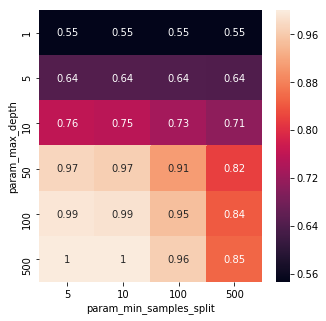

In [150]:
results = pd.DataFrame(GS1.cv_results_)

#https://pbpython.com/pandas-pivot-table-explained.html

pivot_train_1 = pd.pivot_table(results , values='mean_train_score' , index='param_max_depth', columns='param_min_samples_split')

import seaborn as sns 

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_train_1,annot=True)


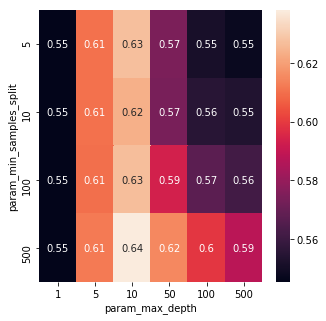

In [152]:
pivot_test = pd.pivot_table(results, values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_test_1,annot=True)

The best parameter for above model is :- 'max_depth': 10, 'min_samples_split': 500 which we get by gridsearchcv with k=10 fold
cross validation. We get an max AUC of 0.64

##### Training model of SET1 with the values obtained from above Gridsearch

In [153]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0]-data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

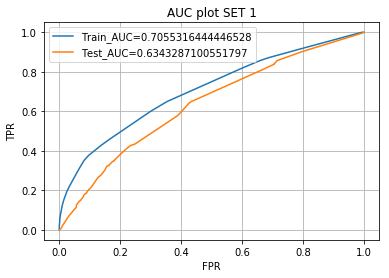

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc

DT=DecisionTreeClassifier(class_weight='balanced',min_samples_split=500,max_depth=10,random_state=5)

DT.fit(X_train_1,y_train)

y_train_pred_1 = batch_predict(DT, X_train_1)
y_test_pred_1 = batch_predict(DT, X_test_1)

train_fpr,train_tpr,tr_thresholds=roc_curve(y_train , y_train_pred_1)
test_fpr,test_tpr,te_thresholds=roc_curve(y_test , y_test_pred_1)

plt.plot(train_fpr,train_tpr,label='Train_AUC='+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label='Test_AUC='+str(auc(test_fpr,test_tpr)))
plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC plot SET 1')
plt.grid()
plt.show()

For a value of max_depth of 10 and min_samples_split of 500 which implies that probability of correctly classified approved
and not-approved projects is 63%

In [156]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Confusion Matrix

In [192]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_1, tr_thresholds, train_fpr, train_tpr)))
print('\n')
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_1, tr_thresholds, test_fpr, test_tpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.42011562057682006 for threshold 0.495
[[ 2414  1049]
 [ 7542 11440]]


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3678803916493212 for threshold 0.408
[[1444 1102]
 [4903 9051]]


the maximum value of tpr*(1-fpr) 0.42011562057682006 for threshold 0.495
the maximum value of tpr*(1-fpr) 0.3678803916493212 for threshold 0.408


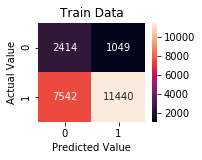

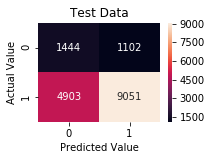

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plotting confusion matrix for train data

fig1 = plt.figure()
ax1 = fig1.add_subplot(221)

confusion_matrix_train = confusion_matrix(y_train, predict(y_train_pred_1 , tr_thresholds , train_fpr , train_tpr))
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train)   # storing in a dataframe

sns.heatmap(confusion_matrix_train_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

## Plotting confusion matrix for test data

fig2 = plt.figure()
ax2 = fig2.add_subplot(222)

confusion_matrix_test = confusion_matrix(y_test , predict(y_test_pred_1 , tr_thresholds , test_fpr , test_tpr))
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test)   # storing in a dataframe

sns.heatmap(confusion_matrix_test_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax2.title.set_text('Test Data')
plt.show()

* True positives: actually positive, predicted as positive
* False positives: actually negative,  predicted as positive
* True negatives: actually negative,  predicted as negative
* False negatives: actually positive,  predicted as negative

Observartions:-
We can see that for Train data:-
    For a threshold of 0.495 we get
    1. True positives: 11440
    2. False positives: 1049
    3. True negatives: 2414
    4. False negatives: 7542

Observartions:-
We can see that for Test data:-
    For a threshold of 0.408 we get
    1. True positives: 9051
    2. False positives: 1102
    3. True negatives: 1444
    4. False negatives: 4903

### <font color='red'>Getting all the FALSE POSITIVES together for further plots</font>:-

In [221]:
#we are going to predict the output using predict function

y_predicted = predict(y_test_pred_1 , tr_thresholds , test_fpr , test_tpr)
# y_predicted is a list
# cross-checking its length
print(len(y_predicted))

y_predicted= np.array(y_predicted)  #converting list to array


the maximum value of tpr*(1-fpr) 0.3678803916493212 for threshold 0.408
16500


In [222]:
## storing new columns in X_test called y_actual and y_predicted and storing in them the test and predicted values resp.

X_test['y_actual'] = y_test             ## as these are actual values
X_test['y_predicted'] = y_predicted     ## as these are predicted values
X_test.head(4)

Unnamed: 0       id                        teacher_id teacher_prefix  \
24511       24084  p202462  0388c77c7ae151c529523db3a7666500           Mrs.   
17367      117325  p100980  78901498caa47caba15bb1f28322bcae           Mrs.   
31142       49994  p174800  bb2599c4a114d211b3381abe9f899bf8           Mrs.   
31802       15681  p183552  3ad5585a7556c0cec0541970709259e9            Ms.   

      school_state                Date  \
24511           IL 2016-08-18 21:32:24   
17367           FL 2017-02-10 12:05:44   
31142           OH 2017-01-06 16:03:05   
31802           CA 2016-09-20 23:34:15   

                                     project_title  \
24511  Accessing the World Through Technology \r\n   
17367                                Hungry Minds!   
31142             Fairy Tales full S.T.E.A.M Ahead   
31802         iNeed an iPad for my Kindergarteners   

                                project_resource_summary  \
24511  My students need 16 Asus Chromebooks and a cha...   
17367  My students need a mini refrigerator to keep t...   
31142  My students need a Fairy Tales Problem Solving...   
31802  My students need an iPad for our classroom to ...   

       teacher_number_of_previously_posted_projects    price     ...       \
24511                                             4  1089.50     ...        
17367                                             4   197.41     ...        
31142                                           103   149.00     ...        
31802                                             4   379.96     ...        

                                     preprocessed_essays  \
24511  students attend high needs public school illin...   
17367  teach kindergarten title 1 school majority stu...   
31142  students show curiosity world around would lik...   
31802  students primarily english language learners l...   

              preprocessed_project_titles positive_sentiment_score  \
24511  accessing world through technology                    0.310   
17367                        hungry minds                    0.257   
31142    fairy tales full s t e a m ahead                    0.319   
31802          ineed ipad kindergarteners                    0.377   

      negative_sentiment_score neutral_sentiment_score  \
24511                    0.034                   0.655   
17367                    0.085                   0.658   
31142                    0.000                   0.681   
31802                    0.000                   0.623   

      compound_sentiment_score essay_word_count  title_word_count  y_actual  \
24511                   0.9961              213                 4         1   
17367                   0.9771              124                 2         1   
31142                   0.9935              136                 9         1   
31802                   0.9948              120                 3         1   

       y_predicted  
24511            1  
17367            0  
31142            1  
31802            1  

[4 rows x 25 columns]

In [223]:
## False positives are the points which are actual negative but predicted as positives
## in coding terms, points for which :- y_actual= 0  &  y_predicted = 1
## this can be achieved by applying boolean operation on X_test

FP = X_test[ (X_test['y_actual']==0) & (X_test['y_predicted']==1)]
FP.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
12021      104137  p170661  533901e226d81ae63271c6ae1ce6d775           Mrs.   
33982      168310  p191444  91dc906b916350b73eac91ee2bd6c372            Ms.   

      school_state                Date        project_title  \
12021           HI 2016-09-13 14:51:59     YES for YEARBOOK   
33982           CA 2016-05-13 23:52:28  STEAM in 4th grade!   

                                project_resource_summary  \
12021  My students need the proper equipment to creat...   
33982  My students need a variety of resources to enr...   

       teacher_number_of_previously_posted_projects    price     ...       \
12021                                            37  1549.95     ...        
33982                                             0   914.29     ...        

                                     preprocessed_essays  \
12021  students come hawaiian homelands lower economi...   
33982  day look ways make learning fun students love ...   

      preprocessed_project_titles positive_sentiment_score  \
12021                yes yearbook                    0.281   
33982             steam 4th grade                    0.258   

      negative_sentiment_score neutral_sentiment_score  \
12021                    0.018                   0.701   
33982                    0.013                   0.729   

      compound_sentiment_score essay_word_count  title_word_count  y_actual  \
12021                   0.9836              107                 2         0   
33982                   0.9903              132                 3         0   

       y_predicted  
12021            1  
33982            1  

[2 rows x 25 columns]

In [224]:
## dropping the columns which we added as their purpose of segregation is served 

FP.drop(['y_actual','y_predicted'],axis=1,inplace=True)

X_test.drop(['y_actual','y_predicted'],axis=1,inplace=True)
print(FP.columns)
FP.head(2)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'clean_categories', 'clean_subcategories', 'clean_grade_category',
       'essay', 'preprocessed_essays', 'preprocessed_project_titles',
       'positive_sentiment_score', 'negative_sentiment_score',
       'neutral_sentiment_score', 'compound_sentiment_score',
       'essay_word_count', 'title_word_count'],
      dtype='object')


Unnamed: 0       id                        teacher_id teacher_prefix  \
12021      104137  p170661  533901e226d81ae63271c6ae1ce6d775           Mrs.   
33982      168310  p191444  91dc906b916350b73eac91ee2bd6c372            Ms.   

      school_state                Date        project_title  \
12021           HI 2016-09-13 14:51:59     YES for YEARBOOK   
33982           CA 2016-05-13 23:52:28  STEAM in 4th grade!   

                                project_resource_summary  \
12021  My students need the proper equipment to creat...   
33982  My students need a variety of resources to enr...   

       teacher_number_of_previously_posted_projects    price  \
12021                                            37  1549.95   
33982                                             0   914.29   

             ...         clean_grade_category  \
12021        ...                Grades_PreK_2   
33982        ...                   Grades_3_5   

                                                   essay  \
12021  My students come from Hawaiian Homelands and a...   
33982  Each day I look for more ways to make learning...   

                                     preprocessed_essays  \
12021  students come hawaiian homelands lower economi...   
33982  day look ways make learning fun students love ...   

      preprocessed_project_titles positive_sentiment_score  \
12021                yes yearbook                    0.281   
33982             steam 4th grade                    0.258   

      negative_sentiment_score neutral_sentiment_score  \
12021                    0.018                   0.701   
33982                    0.013                   0.729   

       compound_sentiment_score  essay_word_count  title_word_count  
12021                    0.9836               107                 2  
33982                    0.9903               132                 3  

[2 rows x 23 columns]

### <font color='red'>Plotting the WordCloud with essay texts of False Positives

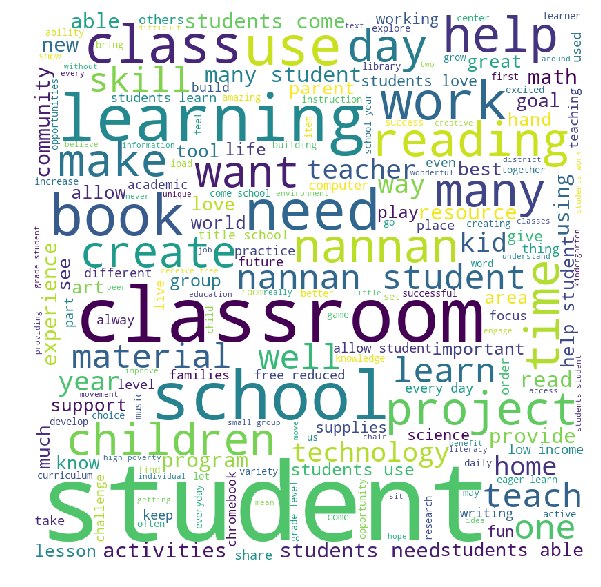

In [228]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/


# importing all necessary modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in FP['preprocessed_essays'].values: 
          
    val = str(val)         # typecaste each val to string 
    tokens = val.split()   # split the value 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### <font color='red'> Plotting the box plot with the price of these False Positive data points </font>

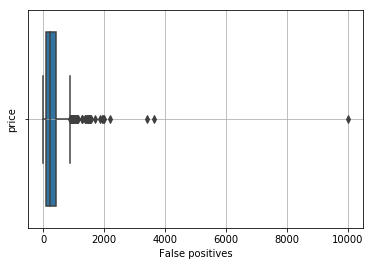

In [238]:
sns.boxplot(x = FP['price'], data=FP)

plt.xlabel('False positives')
plt.ylabel('price')
plt.grid()
plt.show()

Most of the false positives have price around 2000, only one has price near 10000 and none has price greater than 10000

### <font color='red'> Plotting the pdf with the teacher number of previously projects of these False Positive data points </font>

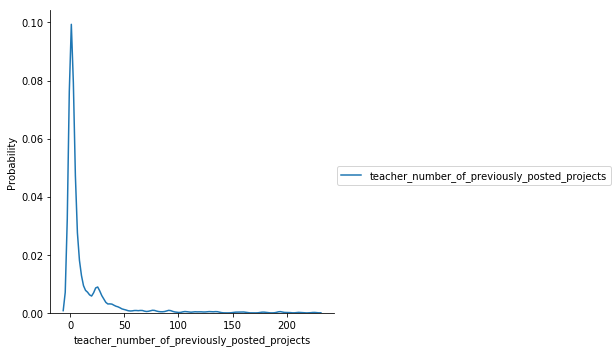

In [255]:
import warnings
warnings.filterwarnings('ignore')

s1=sns.FacetGrid( FP , size=5)
s1=s1.map(sns.kdeplot , "teacher_number_of_previously_posted_projects")
s1=s1.add_legend()
plt.ylabel('Probability')
plt.show()

Most of the false positive projects have mostly teacher_number_of_previously_posted_projects between the range 0 to 50. Not much
false positive projects have higher projects than 50.

### <font color='red'> Visualizing the decision tree using Graphviz </font>

In [256]:
## code is referred from classroom videos
from sklearn import tree
DT = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3)
DT = DT.fit(X_train_1, y_train)

In [267]:
feature_names_1 =[]
feature_names_1.extend(vectorizer_essay_bow.get_feature_names())
feature_names_1.extend(vectorizer_title_bow.get_feature_names())
feature_names_1.extend(vectorizer_school_state.get_feature_names())
feature_names_1.extend(vectorizer_clean_cat.get_feature_names())
feature_names_1.extend(vectorizer_clean_subcat.get_feature_names())
feature_names_1.extend(vectorizer_teacher_prefix.get_feature_names())
feature_names_1.extend(vectorizer_clean_grade.get_feature_names())
feature_names_1.append(normalized_price)
feature_names_1.append(normalized_projects)

len(feature_names_1)

6970

In [268]:
import graphviz

dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names = feature_names_1,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)

graph.render("Decision_Tree_SET1") 

'Decision_Tree_SET1.pdf'

### 2.2 SET2

#### 2.2.1 Applying Decision Trees on SET2

In [269]:
DT = DecisionTreeClassifier(class_weight='balanced')


parameters= { 'max_depth':[1, 5, 10, 50, 100, 500],
              'min_samples_split':[5, 10, 100, 500]}


GS2 = GridSearchCV( DT, parameters, cv= 10, scoring='roc_auc', verbose=1, n_jobs=2, return_train_score= True )
GS2.fit(X_train_2, y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   46.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 17.9min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed: 27.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500],
                         'min_samples_split': [5, 10, 100, 500]},
  

In [271]:
GS2.best_params_

{'max_depth': 10, 'min_samples_split': 500}

Observations:- 
The best parameter for above model is :- 'max_depth': 10, 'min_samples_split': 500

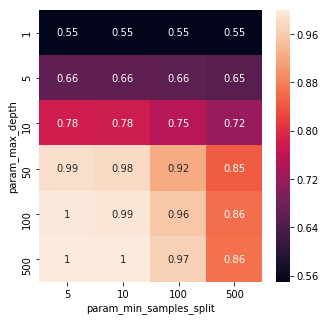

In [272]:
results = pd.DataFrame(GS2.cv_results_)

#https://pbpython.com/pandas-pivot-table-explained.html

pivot_train_2 = pd.pivot_table(results , values='mean_train_score' , index='param_max_depth', columns='param_min_samples_split')

import seaborn as sns 

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_train_2,annot=True)


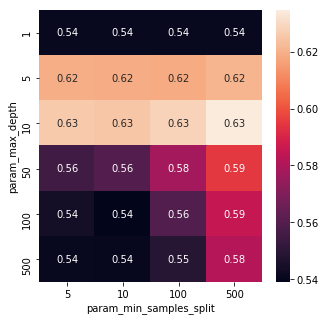

In [273]:
pivot_test_2 = pd.pivot_table(results, values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_test_2 , annot=True)

####  Training the models on the basis of SET2 from parameters obtained from Gridsearch

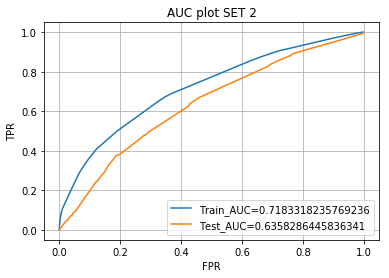

In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc

DT=DecisionTreeClassifier(class_weight='balanced',min_samples_split=500,max_depth=10,random_state=5)

DT.fit(X_train_2 , y_train)

y_train_pred_2 = batch_predict(DT, X_train_2)
y_test_pred_2 = batch_predict(DT, X_test_2)

train_fpr , train_tpr ,tr_thresholds = roc_curve(y_train , y_train_pred_2)
test_fpr , test_tpr , te_thresholds = roc_curve(y_test , y_test_pred_2)

plt.plot(train_fpr , train_tpr , label='Train_AUC='+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr , test_tpr , label='Test_AUC='+str(auc(test_fpr,test_tpr)))
plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC plot SET 2')
plt.grid()
plt.show()

#### Confusion Matrix

In [275]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_2, tr_thresholds, train_fpr, train_tpr)))
print('\n')
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_2, tr_thresholds, test_fpr, test_tpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4393237504241673 for threshold 0.511
[[ 2300  1163]
 [ 6426 12556]]


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.36412531985636565 for threshold 0.511
[[1454 1092]
 [5057 8897]]


the maximum value of tpr*(1-fpr) 0.4393237504241673 for threshold 0.511
the maximum value of tpr*(1-fpr) 0.36412531985636565 for threshold 0.511


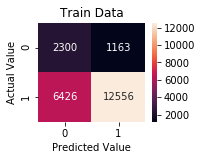

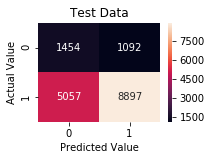

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plotting confusion matrix for train data

fig1 = plt.figure()
ax1 = fig1.add_subplot(221)

confusion_matrix_train = confusion_matrix(y_train, predict(y_train_pred_2 , tr_thresholds , train_fpr , train_tpr))
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train)   # storing in a dataframe

sns.heatmap(confusion_matrix_train_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

## Plotting confusion matrix for test data

fig2 = plt.figure()
ax2 = fig2.add_subplot(222)

confusion_matrix_test = confusion_matrix(y_test , predict(y_test_pred_2 , tr_thresholds , test_fpr , test_tpr))
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test)   # storing in a dataframe

sns.heatmap(confusion_matrix_test_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax2.title.set_text('Test Data')
plt.show()

Train data:-
1. True positives: 12556
2. False positives: 1163
3. True negatives: 2300
4. False negatives: 6426
    
Test data:-
1. True positives: 8897
2. False positives: 1092
3. True negatives: 1454
4. False negatives: 5057

### <font color='red'>Getting all the FALSE POSITIVES together for further plots</font>:-

In [278]:
y_predicted = predict(y_test_pred_2 , tr_thresholds , test_fpr , test_tpr)
print(len(y_predicted))

y_predicted= np.array(y_predicted) 

## storing new columns in X_test called y_actual and y_predicted and storing in them the test and predicted values resp.
X_test['y_actual'] = y_test             ## as these are actual values
X_test['y_predicted'] = y_predicted     ## as these are predicted values

## False positives are the points which are actual negative but predicted as positives
## in coding terms, points for which :- y_actual= 0  &  y_predicted = 1
## this can be achieved by applying boolean operation on X_test

FP2 = X_test[ (X_test['y_actual']==0) & (X_test['y_predicted']==1)]

FP2.drop(['y_actual','y_predicted'],axis=1,inplace=True)

X_test.drop(['y_actual','y_predicted'],axis=1,inplace=True)
FP2.head(2)

the maximum value of tpr*(1-fpr) 0.36412531985636565 for threshold 0.511
16500


Unnamed: 0       id                        teacher_id teacher_prefix  \
12021      104137  p170661  533901e226d81ae63271c6ae1ce6d775           Mrs.   
35278       27828  p071035  4e991fad14524d3801d7c1370ad7c7ac            Ms.   

      school_state                Date                   project_title  \
12021           HI 2016-09-13 14:51:59                YES for YEARBOOK   
35278           MI 2017-02-02 20:32:47  Team Work Makes The Dream Work   

                                project_resource_summary  \
12021  My students need the proper equipment to creat...   
35278  My students need games and activities that foc...   

       teacher_number_of_previously_posted_projects    price  \
12021                                            37  1549.95   
35278                                             8   364.41   

             ...         clean_grade_category  \
12021        ...                Grades_PreK_2   
35278        ...                Grades_PreK_2   

                                                   essay  \
12021  My students come from Hawaiian Homelands and a...   
35278  Our students come from a variety of different ...   

                                     preprocessed_essays  \
12021  students come hawaiian homelands lower economi...   
35278  students come variety different economic backg...   

          preprocessed_project_titles positive_sentiment_score  \
12021                    yes yearbook                    0.281   
35278  team work makes the dream work                    0.379   

      negative_sentiment_score neutral_sentiment_score  \
12021                    0.018                   0.701   
35278                    0.009                   0.612   

       compound_sentiment_score  essay_word_count  title_word_count  
12021                    0.9836               107                 2  
35278                    0.9967               154                 6  

[2 rows x 23 columns]

### <font color='red'> Plotting the WordCloud with all the False Positives </font>:-

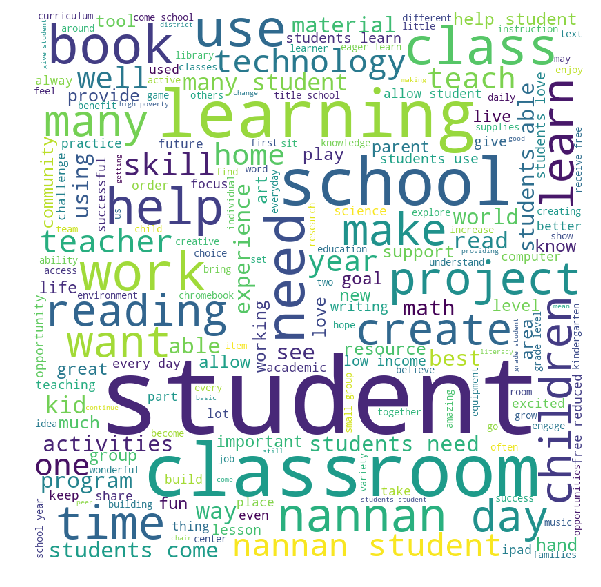

In [279]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/


# importing all necessary modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in FP2['preprocessed_essays'].values: 
          
    val = str(val)         # typecaste each val to string 
    tokens = val.split()   # split the value 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### <font color='red'> Plotting the box plot with the price of these False Positive data points </font>

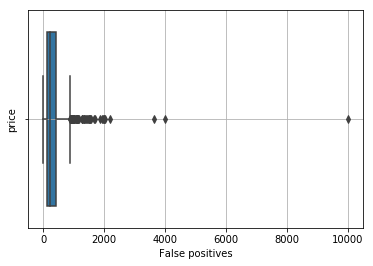

In [280]:
sns.boxplot(x = FP2['price'], data=FP2)

plt.xlabel('False positives')
plt.ylabel('price')
plt.grid()
plt.show()

Observations:
Mostly False positive projects are priced nearly 2000, with a few around 4000 and none above 10000

### <font color='red'>Plotting the pdf teacher_number_of_previously_posted_projects of these False Positive data points </font>

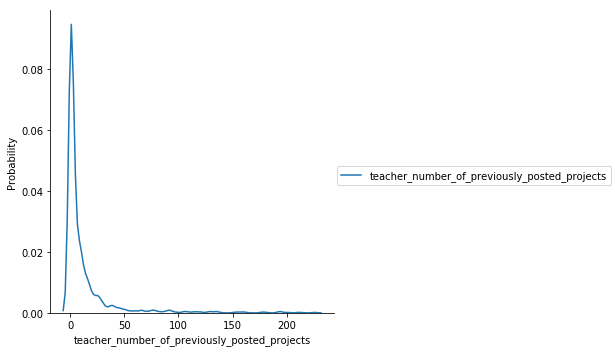

In [281]:
import warnings
warnings.filterwarnings('ignore')

s1=sns.FacetGrid( FP2 , size=5)
s1=s1.map(sns.kdeplot , "teacher_number_of_previously_posted_projects")
s1=s1.add_legend()
plt.ylabel('Probability')
plt.show()

Observations:
Most of the false positive projects have mostly teacher_number_of_previously_posted_projects between the range 0 to 50. Not many
false positive projects have higher projects than 50.

### <font color='red'> Visualizing Decision Tree using Graphiz </font>

In [283]:
## code is referred from classroom videos
from sklearn import tree
DT = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=3)
DT = DT.fit(X_train_2 , y_train)

In [284]:
feature_names_2 =[]
feature_names_2.extend(vectorizer_essay_tfidf.get_feature_names())
feature_names_2.extend(vectorizer_title_tfidf.get_feature_names())
feature_names_2.extend(vectorizer_school_state.get_feature_names())
feature_names_2.extend(vectorizer_clean_cat.get_feature_names())
feature_names_2.extend(vectorizer_clean_subcat.get_feature_names())
feature_names_2.extend(vectorizer_teacher_prefix.get_feature_names())
feature_names_2.extend(vectorizer_clean_grade.get_feature_names())
feature_names_2.append(normalized_price)
feature_names_2.append(normalized_projects)

len(feature_names_2)

6970

In [285]:
import graphviz

dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names = feature_names_2,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)

graph.render("Decision_Tree_SET2") 

'Decision_Tree_SET2.pdf'

## 2.3 SET3

#### 2.3.1 Applying Decision Trees on SET3

In [286]:
DT = DecisionTreeClassifier(class_weight='balanced')


parameters= { 'max_depth':[1, 5, 10, 50, 100, 500],
              'min_samples_split':[5, 10, 100, 500]}


GS3 = GridSearchCV( DT, parameters, cv= 10, scoring='roc_auc', verbose=1, n_jobs=2, return_train_score= True )
GS3.fit(X_train_3, y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 55.3min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed: 77.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500],
                         'min_samples_split': [5, 10, 100, 500]},
  

In [287]:
GS3.best_params_

{'max_depth': 5, 'min_samples_split': 500}

Observations:- 
The best parameter for above model is :- 'max_depth': 5, 'min_samples_split': 500

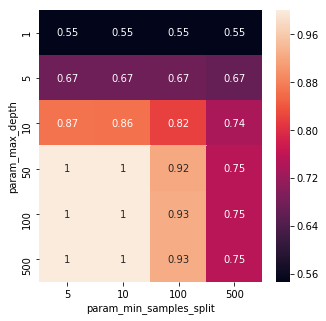

In [288]:
results = pd.DataFrame(GS3.cv_results_)

#https://pbpython.com/pandas-pivot-table-explained.html

pivot_train_3 = pd.pivot_table(results , values='mean_train_score' , index='param_max_depth', columns='param_min_samples_split')

import seaborn as sns 

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_train_3,annot=True)


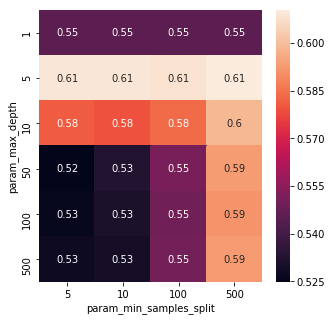

In [289]:
pivot_test_3 = pd.pivot_table(results, values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_test_3 , annot=True)

####  Training the models on the basis of SET3 from parameters obtained from Gridsearch

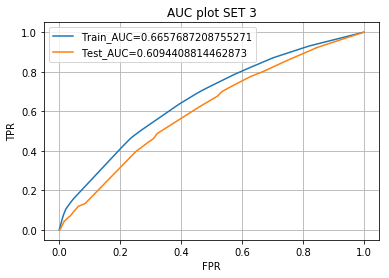

In [290]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc

DT=DecisionTreeClassifier(class_weight='balanced',min_samples_split=500,max_depth=5,random_state=5)

DT.fit(X_train_3 , y_train)

y_train_pred_3 = batch_predict(DT, X_train_3)
y_test_pred_3 = batch_predict(DT, X_test_3)

train_fpr , train_tpr ,tr_thresholds = roc_curve(y_train , y_train_pred_3)
test_fpr , test_tpr , te_thresholds = roc_curve(y_test , y_test_pred_3)

plt.plot(train_fpr , train_tpr , label='Train_AUC='+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr , test_tpr , label='Test_AUC='+str(auc(test_fpr,test_tpr)))
plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC plot SET 3')
plt.grid()
plt.show()

#### Confusion Matrix

In [291]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_3, tr_thresholds, train_fpr, train_tpr)))
print('\n')
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_3, tr_thresholds, test_fpr, test_tpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.38578731045807696 for threshold 0.515
[[ 2100  1363]
 [ 6906 12076]]


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3361238773431411 for threshold 0.515
[[1374 1172]
 [5263 8691]]


the maximum value of tpr*(1-fpr) 0.38578731045807696 for threshold 0.515
the maximum value of tpr*(1-fpr) 0.3361238773431411 for threshold 0.515


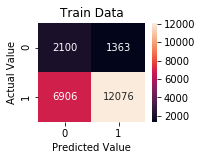

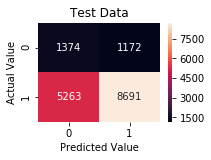

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plotting confusion matrix for train data

fig1 = plt.figure()
ax1 = fig1.add_subplot(221)

confusion_matrix_train = confusion_matrix(y_train, predict(y_train_pred_3 , tr_thresholds , train_fpr , train_tpr))
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train)   # storing in a dataframe

sns.heatmap(confusion_matrix_train_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

## Plotting confusion matrix for test data

fig2 = plt.figure()
ax2 = fig2.add_subplot(222)

confusion_matrix_test = confusion_matrix(y_test , predict(y_test_pred_3 , tr_thresholds , test_fpr , test_tpr))
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test)   # storing in a dataframe

sns.heatmap(confusion_matrix_test_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax2.title.set_text('Test Data')
plt.show()

Train data:-
1. True positives: 12076
2. False positives: 1363
3. True negatives: 2100
4. False negatives: 6906
    
Test data:-
1. True positives: 8691
2. False positives: 1172
3. True negatives: 1374
4. False negatives: 5263

### <font color='red'>Getting all the FALSE POSITIVES together for further plots</font>:-

In [293]:
y_predicted = predict(y_test_pred_3 , tr_thresholds , test_fpr , test_tpr)
print(len(y_predicted))

y_predicted= np.array(y_predicted) 

## storing new columns in X_test called y_actual and y_predicted and storing in them the test and predicted values resp.
X_test['y_actual'] = y_test             ## as these are actual values
X_test['y_predicted'] = y_predicted     ## as these are predicted values

## False positives are the points which are actual negative but predicted as positives
## in coding terms, points for which :- y_actual= 0  &  y_predicted = 1
## this can be achieved by applying boolean operation on X_test

FP3 = X_test[ (X_test['y_actual']==0) & (X_test['y_predicted']==1)]

FP3.drop(['y_actual','y_predicted'],axis=1,inplace=True)

X_test.drop(['y_actual','y_predicted'],axis=1,inplace=True)
FP3.head(2)

the maximum value of tpr*(1-fpr) 0.3361238773431411 for threshold 0.515
16500


Unnamed: 0       id                        teacher_id teacher_prefix  \
37581       44378  p094056  ee899ba8155fdd3192c6b6d5ef2cec78            Ms.   
24505      108961  p114657  80c213f0d84eec7fa0a24ed7f474bba6           Mrs.   

      school_state                Date               project_title  \
37581           FL 2016-12-07 16:14:33                Being Crafty   
24505           DE 2016-08-05 08:17:43  I like to Move it Move it!   

                                project_resource_summary  \
37581  My students need art supplies to bring out the...   
24505  My students need a variety of sturdy sports ba...   

       teacher_number_of_previously_posted_projects   price        ...         \
37581                                             8  221.17        ...          
24505                                             2  223.85        ...          

       clean_grade_category  \
37581         Grades_PreK_2   
24505         Grades_PreK_2   

                                                   essay  \
37581  \"The future of the world is in my classroom t...   
24505  Our district is known as the best little distr...   

                                     preprocessed_essays  \
37581  future world classroom today ivan w fitzwater ...   
24505  district known best little district delaware s...   

      preprocessed_project_titles positive_sentiment_score  \
37581                being crafty                    0.461   
24505            i like move move                    0.261   

      negative_sentiment_score neutral_sentiment_score  \
37581                    0.015                   0.524   
24505                    0.073                   0.666   

       compound_sentiment_score  essay_word_count  title_word_count  
37581                    0.9959               103                 2  
24505                    0.9735               107                 4  

[2 rows x 23 columns]

### <font color='red'> Plotting WordCloud with all the FALSE POSITIVES </font>:-

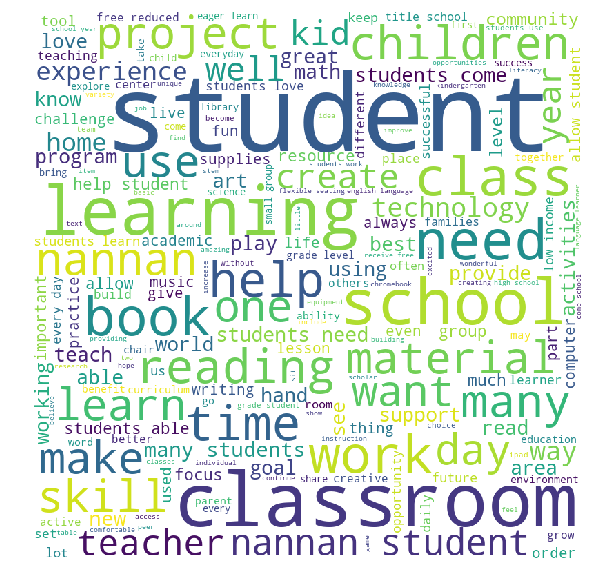

In [294]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/


# importing all necessary modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in FP3['preprocessed_essays'].values: 
          
    val = str(val)         # typecaste each val to string 
    tokens = val.split()   # split the value 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### <font color='red'> Plotting Box-Plots with price of False Positives</font>:-

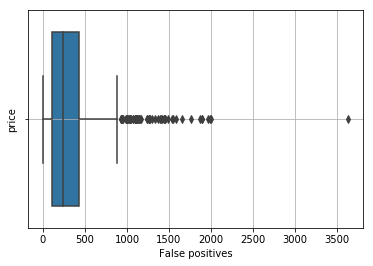

In [295]:
sns.boxplot(x = FP3['price'], data=FP3)

plt.xlabel('False positives')
plt.ylabel('price')
plt.grid()
plt.show()

### <font color='red'>Plotting the PDF's with teacher_number_of_previously_posted_projects of FALSE POSITIVES</font>:-

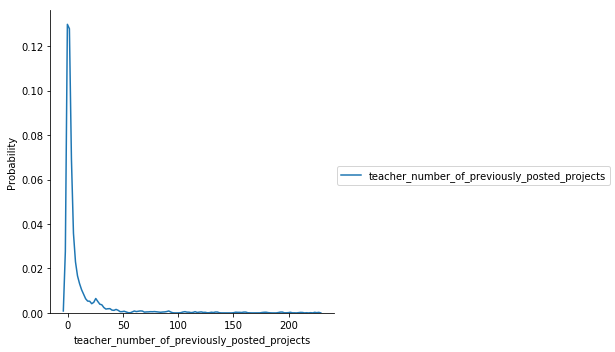

In [297]:
import warnings
warnings.filterwarnings('ignore')

s1=sns.FacetGrid( FP3 , size=5)
s1=s1.map(sns.kdeplot , "teacher_number_of_previously_posted_projects")
s1=s1.add_legend()
plt.ylabel('Probability')
plt.show()

## 2.3 SET4

#### 2.3.1 Applying Decision Trees on SET4

In [298]:

DT = DecisionTreeClassifier(class_weight='balanced')


parameters= { 'max_depth':[1, 5, 10, 50, 100, 500],
              'min_samples_split':[5, 10, 100, 500]}


GS4 = GridSearchCV( DT, parameters, cv= 10, scoring='roc_auc', verbose=1, n_jobs=2, return_train_score= True )
GS4.fit(X_train_4, y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 56.6min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed: 77.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500],
                         'min_samples_split': [5, 10, 100, 500]},
  

In [299]:
GS4.best_params_


{'max_depth': 5, 'min_samples_split': 500}

Observations:- 
The best parameter for above model is :- 'max_depth': 5, 'min_samples_split': 500

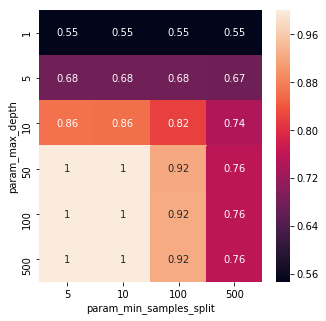

In [300]:

results = pd.DataFrame(GS4.cv_results_)

#https://pbpython.com/pandas-pivot-table-explained.html

pivot_train_4 = pd.pivot_table(results , values='mean_train_score' , index='param_max_depth', columns='param_min_samples_split')

import seaborn as sns 

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_train_4,annot=True)

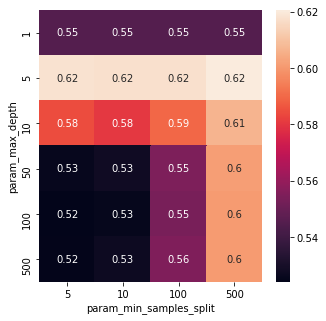

In [301]:

pivot_test_4 = pd.pivot_table(results, values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_test_4 , annot=True)

####  Training the models on the basis of SET4 from parameters obtained from Gridsearch

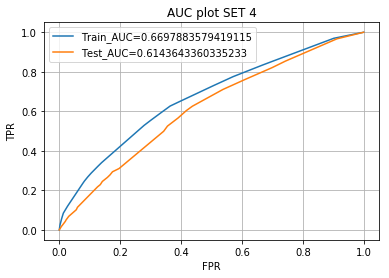

In [302]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc

DT=DecisionTreeClassifier(class_weight='balanced',min_samples_split=500,max_depth=5,random_state=5)

DT.fit(X_train_4 , y_train)

y_train_pred_4 = batch_predict(DT, X_train_4)
y_test_pred_4 = batch_predict(DT, X_test_4)

train_fpr , train_tpr ,tr_thresholds = roc_curve(y_train , y_train_pred_4)
test_fpr , test_tpr , te_thresholds = roc_curve(y_test , y_test_pred_4)

plt.plot(train_fpr , train_tpr , label='Train_AUC='+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr , test_tpr , label='Test_AUC='+str(auc(test_fpr,test_tpr)))
plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC plot SET 4')
plt.grid()
plt.show()

#### Confusion Matrix

In [303]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_4, tr_thresholds, train_fpr, train_tpr)))
print('\n')
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_4, tr_thresholds, test_fpr, test_tpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.39842885943924927 for threshold 0.529
[[ 2202  1261]
 [ 7088 11894]]


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3521705703207746 for threshold 0.423
[[1433 1113]
 [5223 8731]]


the maximum value of tpr*(1-fpr) 0.39842885943924927 for threshold 0.529
the maximum value of tpr*(1-fpr) 0.3521705703207746 for threshold 0.423


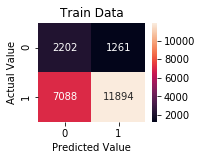

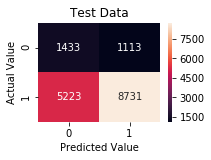

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plotting confusion matrix for train data

fig1 = plt.figure()
ax1 = fig1.add_subplot(221)

confusion_matrix_train = confusion_matrix(y_train, predict(y_train_pred_4 , tr_thresholds , train_fpr , train_tpr))
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train)   # storing in a dataframe

sns.heatmap(confusion_matrix_train_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

## Plotting confusion matrix for test data

fig2 = plt.figure()
ax2 = fig2.add_subplot(222)

confusion_matrix_test = confusion_matrix(y_test , predict(y_test_pred_4 , tr_thresholds , test_fpr , test_tpr))
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test)   # storing in a dataframe

sns.heatmap(confusion_matrix_test_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax2.title.set_text('Test Data')
plt.show()

Train data:-
1. True positives: 11894
2. False positives: 1261
3. True negatives: 2202
4. False negatives: 7088
    
Test data:-
1. True positives: 8731
2. False positives: 1113
3. True negatives: 1433
4. False negatives: 5223

### <font color='red'>Getting all the FALSE POSITIVES together for further plots</font>:-

In [305]:
y_predicted = predict(y_test_pred_4 , tr_thresholds , test_fpr , test_tpr)
print(len(y_predicted))

y_predicted= np.array(y_predicted) 

## storing new columns in X_test called y_actual and y_predicted and storing in them the test and predicted values resp.
X_test['y_actual'] = y_test             ## as these are actual values
X_test['y_predicted'] = y_predicted     ## as these are predicted values

## False positives are the points which are actual negative but predicted as positives
## in coding terms, points for which :- y_actual= 0  &  y_predicted = 1
## this can be achieved by applying boolean operation on X_test

FP4 = X_test[ (X_test['y_actual']==0) & (X_test['y_predicted']==1)]

FP4.drop(['y_actual','y_predicted'],axis=1,inplace=True)

X_test.drop(['y_actual','y_predicted'],axis=1,inplace=True)
FP4.head(2)

the maximum value of tpr*(1-fpr) 0.3521705703207746 for threshold 0.423
16500


Unnamed: 0       id                        teacher_id teacher_prefix  \
37581       44378  p094056  ee899ba8155fdd3192c6b6d5ef2cec78            Ms.   
12021      104137  p170661  533901e226d81ae63271c6ae1ce6d775           Mrs.   

      school_state                Date     project_title  \
37581           FL 2016-12-07 16:14:33      Being Crafty   
12021           HI 2016-09-13 14:51:59  YES for YEARBOOK   

                                project_resource_summary  \
37581  My students need art supplies to bring out the...   
12021  My students need the proper equipment to creat...   

       teacher_number_of_previously_posted_projects    price  \
37581                                             8   221.17   
12021                                            37  1549.95   

             ...         clean_grade_category  \
37581        ...                Grades_PreK_2   
12021        ...                Grades_PreK_2   

                                                   essay  \
37581  \"The future of the world is in my classroom t...   
12021  My students come from Hawaiian Homelands and a...   

                                     preprocessed_essays  \
37581  future world classroom today ivan w fitzwater ...   
12021  students come hawaiian homelands lower economi...   

      preprocessed_project_titles positive_sentiment_score  \
37581                being crafty                    0.461   
12021                yes yearbook                    0.281   

      negative_sentiment_score neutral_sentiment_score  \
37581                    0.015                   0.524   
12021                    0.018                   0.701   

       compound_sentiment_score  essay_word_count  title_word_count  
37581                    0.9959               103                 2  
12021                    0.9836               107                 2  

[2 rows x 23 columns]

### <font color='red'> Plotting WordCloud with all the FALSE POSITIVES </font>:-

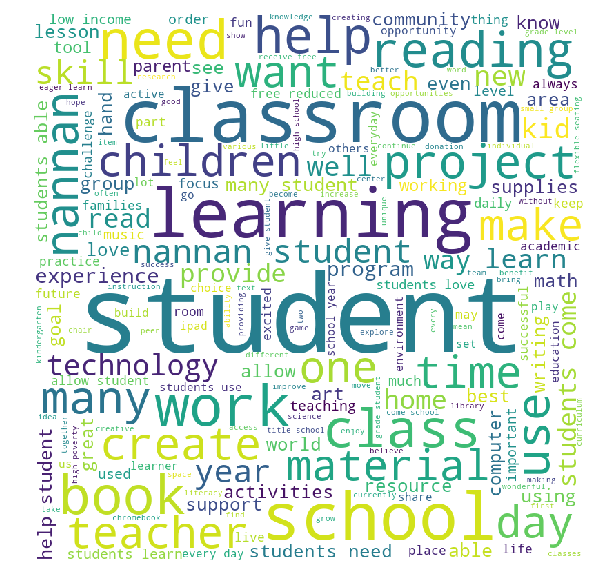

In [306]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/


# importing all necessary modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in FP4['preprocessed_essays'].values: 
          
    val = str(val)         # typecaste each val to string 
    tokens = val.split()   # split the value 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### <font color='red'> Plotting Box-Plots with price of False Positives</font>:-

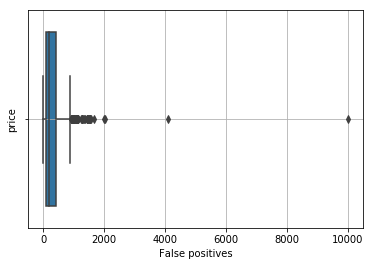

In [307]:

sns.boxplot(x = FP4['price'], data=FP4)

plt.xlabel('False positives')
plt.ylabel('price')
plt.grid()
plt.show()

### <font color='red'>Plotting the PDF's with teacher_number_of_previously_posted_projects of FALSE POSITIVES</font>:-

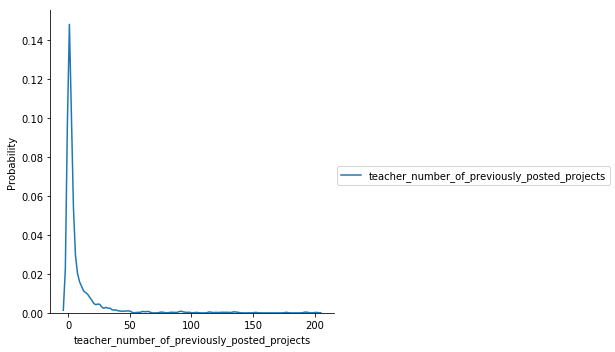

In [308]:
import warnings
warnings.filterwarnings('ignore')

s1=sns.FacetGrid( FP4 , size=5)
s1=s1.map(sns.kdeplot , "teacher_number_of_previously_posted_projects")
s1=s1.add_legend()
plt.ylabel('Probability')
plt.show()

Observations:-

Most of the false positives have between 0 to 50 as previously posted projects.

## 2.5 SET5

### Getting top 5000 features using feature_importances_

In [335]:
from scipy.sparse import hstack

X_train_5 = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_school_state_ohe,X_train_clean_category_ohe,X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe,X_train_grade_ohe, X_train_price_norm.T,X_train_previous_projects_norm.T)).tocsr()
X_cv_5 = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_school_state_ohe,X_cv_clean_category_ohe,X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe,X_cv_grade_ohe, X_cv_price_norm.T,X_cv_previous_projects_norm.T)).tocsr()
X_test_5 = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_school_state_ohe,X_test_clean_category_ohe,X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe,X_test_grade_ohe, X_test_price_norm.T,X_test_previous_projects_norm.T)).tocsr()

print("Final Data matrix for Set 5")
print(X_train_5.shape, y_train.shape)
print(X_cv_5.shape, y_cv.shape)
print(X_test_5.shape, y_test.shape)
print("="*100)

Final Data matrix for Set 5
(22445, 6970) (22445,)
(11055, 6970) (11055,)
(16500, 6970) (16500,)


In [336]:
print('Shape of train before feature importance', X_train_5.shape )
print('Shape of test before feature importance', X_test_5.shape )

Shape of train before feature importance (22445, 6970)
Shape of test before feature importance (16500, 6970)


In [337]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

DT = DecisionTreeClassifier(class_weight="balanced")
DT.fit(X_train_5 , y_train)
print(DT.feature_importances_) 

[0.         0.         0.         ... 0.00058609 0.03280703 0.01773028]


In [338]:
#https://datascience.stackexchange.com/questions/31406/tree-decisiontree-feature-importances-numbers-correspond-to-how-features?rq=1
#use inbuilt class feature_importances of tree based classifiers

feat_importances = pd.Series(DT.feature_importances_)

feat_importances_index_sorted = feat_importances.argsort()   # sorting in ascending order
feat_importances_index = feat_importances_index_sorted[::-1]  # sorting in descending order

feat_importances_index.shape

(6970,)

In [339]:
X_train_5 = X_train_5[:,feat_importances_index[:5000]]

X_test_5 = X_test_5[:,feat_importances_index[:5000]]

print('Shape of train after feature importance', X_train_5.shape )
print('Shape of test after feature importance', X_test_5.shape )

Shape of train after feature importance (22445, 5000)
Shape of test after feature importance (16500, 5000)


In [340]:
DT = DecisionTreeClassifier(class_weight='balanced')


parameters= { 'max_depth':[1, 5, 10, 50, 100, 500],
              'min_samples_split':[5, 10, 100, 500]}


GS5 = GridSearchCV( DT, parameters, cv= 10, scoring='roc_auc', verbose=1, n_jobs=2, return_train_score= True )
GS5.fit(X_train_5, y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 16.9min
[Parallel(n_jobs=2)]: Done 240 out of 240 | elapsed: 25.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=2,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500],
                         'min_samples_split': [5, 10, 100, 500]},
  

In [341]:
GS5.best_params_


{'max_depth': 10, 'min_samples_split': 500}

Observations:- 
The best parameter for above model is :- 'max_depth': 10 , 'min_samples_split': 500

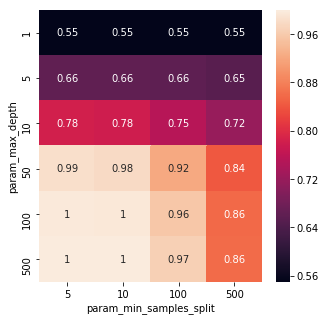

In [342]:

results = pd.DataFrame(GS5.cv_results_)

#https://pbpython.com/pandas-pivot-table-explained.html

pivot_train_5 = pd.pivot_table(results , values='mean_train_score' , index='param_max_depth', columns='param_min_samples_split')

import seaborn as sns 

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_train_5,annot=True)

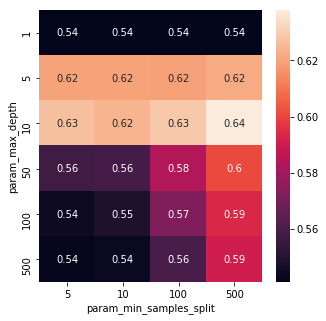

In [343]:

pivot_test_5 = pd.pivot_table(results, values='mean_test_score', index='param_max_depth', columns='param_min_samples_split')

fig = plt.figure(figsize=(5,5))
sns.heatmap(pivot_test_5 , annot=True)

####  Training the models on the basis of SET5 from parameters obtained from Gridsearch

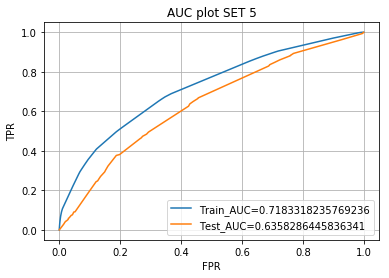

In [344]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc

DT=DecisionTreeClassifier(class_weight='balanced',min_samples_split=500,max_depth=10,random_state=5)

DT.fit(X_train_5 , y_train)

y_train_pred_5 = batch_predict(DT, X_train_5)
y_test_pred_5 = batch_predict(DT, X_test_5)

train_fpr , train_tpr ,tr_thresholds = roc_curve(y_train , y_train_pred_5)
test_fpr , test_tpr , te_thresholds = roc_curve(y_test , y_test_pred_5)

plt.plot(train_fpr , train_tpr , label='Train_AUC='+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr , test_tpr , label='Test_AUC='+str(auc(test_fpr,test_tpr)))
plt.legend(loc=0)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC plot SET 5')
plt.grid()
plt.show()

#### Confusion Matrix

In [345]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred_5, tr_thresholds, train_fpr, train_tpr)))
print('\n')
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred_5, tr_thresholds, test_fpr, test_tpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4393237504241673 for threshold 0.511
[[ 2300  1163]
 [ 6426 12556]]


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.36412531985636565 for threshold 0.511
[[1454 1092]
 [5057 8897]]


the maximum value of tpr*(1-fpr) 0.4393237504241673 for threshold 0.511
the maximum value of tpr*(1-fpr) 0.36412531985636565 for threshold 0.511


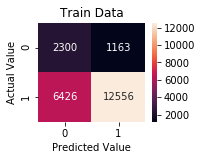

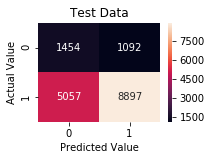

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

## Plotting confusion matrix for train data

fig1 = plt.figure()
ax1 = fig1.add_subplot(221)

confusion_matrix_train = confusion_matrix(y_train, predict(y_train_pred_5 , tr_thresholds , train_fpr , train_tpr))
confusion_matrix_train_df = pd.DataFrame(confusion_matrix_train)   # storing in a dataframe

sns.heatmap(confusion_matrix_train_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax1.title.set_text('Train Data')
plt.subplots_adjust(wspace=0.5)

## Plotting confusion matrix for test data

fig2 = plt.figure()
ax2 = fig2.add_subplot(222)

confusion_matrix_test = confusion_matrix(y_test , predict(y_test_pred_5 , tr_thresholds , test_fpr , test_tpr))
confusion_matrix_test_df = pd.DataFrame(confusion_matrix_test)   # storing in a dataframe

sns.heatmap(confusion_matrix_test_df , annot=True, fmt='0.0f' , annot_kws={'size':10} )

plt.title("X_train Confusion Matrix")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
ax2.title.set_text('Test Data')
plt.show()

Train data:-
1. True positives: 12556
2. False positives: 1163
3. True negatives: 2300
4. False negatives: 6426
    
Test data:-
1. True positives: 8897
2. False positives: 1092
3. True negatives: 1454
4. False negatives: 5057

### <font color='red'>Getting all the FALSE POSITIVES together for further plots</font>:-

In [347]:
y_predicted = predict(y_test_pred_5 , tr_thresholds , test_fpr , test_tpr)
print(len(y_predicted))

y_predicted= np.array(y_predicted) 

## storing new columns in X_test called y_actual and y_predicted and storing in them the test and predicted values resp.
X_test['y_actual'] = y_test             ## as these are actual values
X_test['y_predicted'] = y_predicted     ## as these are predicted values

## False positives are the points which are actual negative but predicted as positives
## in coding terms, points for which :- y_actual= 0  &  y_predicted = 1
## this can be achieved by applying boolean operation on X_test

FP5 = X_test[ (X_test['y_actual']==0) & (X_test['y_predicted']==1)]

FP5.drop(['y_actual','y_predicted'],axis=1,inplace=True)

X_test.drop(['y_actual','y_predicted'],axis=1,inplace=True)
FP5.head(2)

the maximum value of tpr*(1-fpr) 0.36412531985636565 for threshold 0.511
16500


Unnamed: 0       id                        teacher_id teacher_prefix  \
12021      104137  p170661  533901e226d81ae63271c6ae1ce6d775           Mrs.   
35278       27828  p071035  4e991fad14524d3801d7c1370ad7c7ac            Ms.   

      school_state                Date                   project_title  \
12021           HI 2016-09-13 14:51:59                YES for YEARBOOK   
35278           MI 2017-02-02 20:32:47  Team Work Makes The Dream Work   

                                project_resource_summary  \
12021  My students need the proper equipment to creat...   
35278  My students need games and activities that foc...   

       teacher_number_of_previously_posted_projects    price  \
12021                                            37  1549.95   
35278                                             8   364.41   

             ...         clean_grade_category  \
12021        ...                Grades_PreK_2   
35278        ...                Grades_PreK_2   

                                                   essay  \
12021  My students come from Hawaiian Homelands and a...   
35278  Our students come from a variety of different ...   

                                     preprocessed_essays  \
12021  students come hawaiian homelands lower economi...   
35278  students come variety different economic backg...   

          preprocessed_project_titles positive_sentiment_score  \
12021                    yes yearbook                    0.281   
35278  team work makes the dream work                    0.379   

      negative_sentiment_score neutral_sentiment_score  \
12021                    0.018                   0.701   
35278                    0.009                   0.612   

       compound_sentiment_score  essay_word_count  title_word_count  
12021                    0.9836               107                 2  
35278                    0.9967               154                 6  

[2 rows x 23 columns]

### <font color='red'> Plotting WordCloud with all the FALSE POSITIVES </font>:-

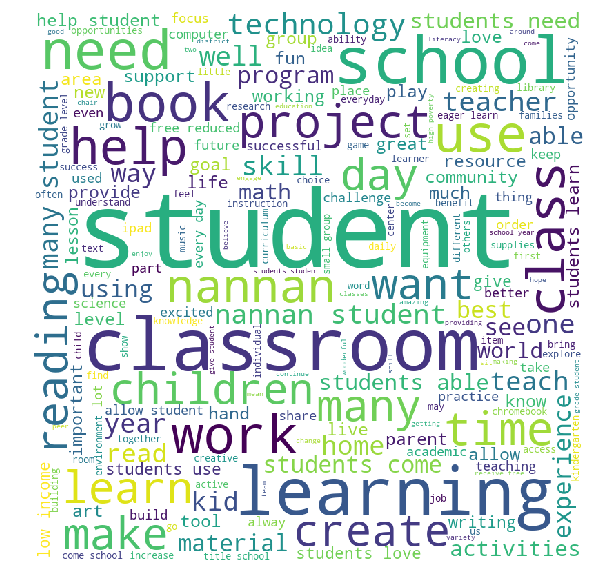

In [348]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/


# importing all necessary modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in FP5['preprocessed_essays'].values: 
          
    val = str(val)         # typecaste each val to string 
    tokens = val.split()   # split the value 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### <font color='red'> Plotting Box-Plots with price of False Positives</font>:-

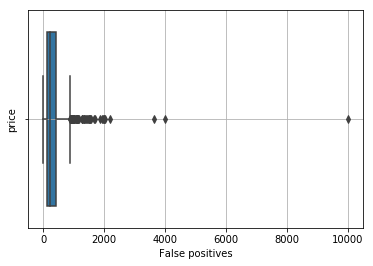

In [349]:

sns.boxplot(x = FP5['price'], data=FP5)

plt.xlabel('False positives')
plt.ylabel('price')
plt.grid()
plt.show()

### <font color='red'>Plotting the PDF's with teacher_number_of_previously_posted_projects of FALSE POSITIVES</font>:-

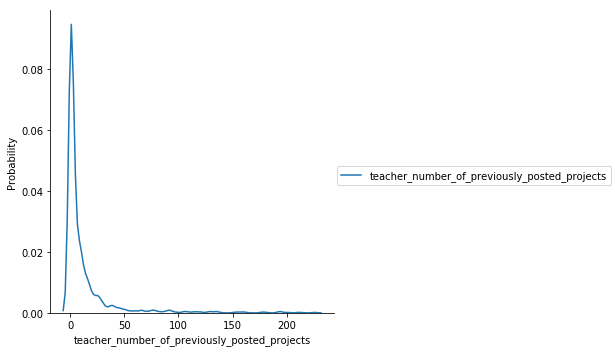

In [350]:
import warnings
warnings.filterwarnings('ignore')

s1=sns.FacetGrid( FP5 , size=5)
s1=s1.map(sns.kdeplot , "teacher_number_of_previously_posted_projects")
s1=s1.add_legend()
plt.ylabel('Probability')
plt.show()

Observations:-

Most of the false positives have between 0 to 50 as previously posted projects.

### PRETTYTABLE

In [351]:
## http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["SET", "Max Depth", "Min Sample Split", " Test AUC"]

x.add_row(["SET1(BOW)", 10 , 500, 0.6343])
x.add_row(["SET2(TFIDF)", 10 , 500, 0.6358])
x.add_row(["SET3(Avg W2V)",5, 500, 0.6094])
x.add_row(["SET2(TFIDF W2V)",5, 500, 0.6143])
x.add_row(["SET5",10, 500, 0.6358])
print(x)

+-----------------+-----------+------------------+-----------+
|       SET       | Max Depth | Min Sample Split |  Test AUC |
+-----------------+-----------+------------------+-----------+
|    SET1(BOW)    |     10    |       500        |   0.6343  |
|   SET2(TFIDF)   |     10    |       500        |   0.6358  |
|  SET3(Avg W2V)  |     5     |       500        |   0.6094  |
| SET2(TFIDF W2V) |     5     |       500        |   0.6143  |
|       SET5      |     10    |       500        |   0.6358  |
+-----------------+-----------+------------------+-----------+
